# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Asking Questions</a></li>
<li><a href="#reshape">Reshaping the data</a></li>    
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#reshaping">Reshaping the data</a></li>
<li><a href="#desc">Description of the data</a></li>
<li><a href="#runtime">Fixing Runtime</a></li>
<li><a href="#votes">Fixing votes</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#profits">Profits Analysis</a></li>
<li><a href="#gen">Genres Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# View the data

In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import json


In [262]:
from matplotlib import figure
f = figure.Figure( figsize =(7,7) )

In [263]:
sns.set(rc={'figure.figsize':(16,10)})

In [264]:
df = pd.read_csv('movie.csv')

In [265]:
# General dataframe shape
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


<a id='intro'></a>
# Asking Questions
### Asses the quality of the data, what attributes should be revised?
## Quick insights
#### What is The most popular movie, according to popularity and vote avg. ?
#### The Most profitable movie?
## Numeric information
####  the correlation between vote average and the popularity, do they indicate the same metric?
####  is there a correlation between budget and ROI , does spending more on production gurentees more profits?
####  the correlation between profits and popularity/vote average/vote count, #question?
####  the relation between runtime & popularity, what is the sweetspot for which the movie isn't too long nor too short for viewers?
## Categorical information
#### what movie genre has the most movies in terms of count?
#### what movie genre is the most popular over the years?
#### what movie genre costs the most on avg?
#### what movie genre returns the most profits on avg?
#### what movie genre has the highest rating on avg ?



<a id='reshape'></a>
# Reshaping the Dataframe


In [266]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

## drop all unnecessary columns

In [267]:
# non relevant attributes for our analysis are
# homepage            ---->  not relevant
# id                  ---->  better let title be the index
# original_title      ---->  Redundant, title already exists
# keywords            ---->  NLP use
# original_language   ---->  NLP use
# overview            ---->  NLP use
# spoken_languages    ---->  NLP use
# tagline             ---->  NLP use
# production_countries ----> not relevant
# production_companies ----> not relevant
# status              ---->  assume all movies are released


In [268]:
# let title be the dataframe index
#df = df.set_index('title')

In [269]:
# droping the irrelavant columns
df.drop(['homepage','id','keywords','original_language','original_title','overview','spoken_languages','tagline','production_countries' ,'production_companies','status'], axis=1, inplace=True )



In [270]:
# create a column for ROI, "return on invesmet" as profitability metric used to evaluate how well an investment has performed.
# ROI or return on invesment is calculated as follow : (revenue - budget)/budget multiplied by 100% to get the percentage.
df["ROI_%"] = round(((df["revenue"] - df["budget"])/df["budget"])* 100 ,0)
df.head(1)


,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,ROI_%
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,11800,1076.0


In [271]:
df[df["title"] == "Paranormal Activity"]

,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,ROI_%
4577,15000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",47.456823,2007-09-14,193355800,86.0,Paranormal Activity,5.9,1316,1288939.0


In [272]:
# create a more meaningful relationship between vote_average and vote_count
# more counts should have more weight

In [273]:
# change the release date to only the year format

df['year'] = pd.DatetimeIndex(df['release_date']).year
df.drop('release_date' , axis=1, inplace=True )
df.head(1)


# no need to change its datatype to date as it wont effect the analysis
#df['year']= pd.to_datetime(df['year'])



,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,ROI_%,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,2787965087,162.0,Avatar,7.2,11800,1076.0,2009.0


# later create a seperate dataframe to analyse movie genres

# shape & Info

In [274]:
# number of rows as instances and columns as atributes
df.shape

(4803, 10)

In [275]:
#general information on data, mainly coulumn labels, missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4803 non-null   int64  
 1   genres        4803 non-null   object 
 2   popularity    4803 non-null   float64
 3   revenue       4803 non-null   int64  
 4   runtime       4801 non-null   float64
 5   title         4803 non-null   object 
 6   vote_average  4803 non-null   float64
 7   vote_count    4803 non-null   int64  
 8   ROI_%         3913 non-null   float64
 9   year          4802 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 375.4+ KB


<a id='wrangling'></a>
# Data wrangling


In [276]:
#  check for null values and in which attributes
df.isnull().values.any()


True

### Missing values are in rutime & year
#### ROI_% has other problems such as, some values are infinity and lot are null

In [277]:
#  impute the missing values of runtime with the mean
runtime_mean = df['runtime'].mean()
df['runtime'].fillna(runtime_mean, inplace = True)

In [278]:
#view missing values in year column
df[df.year.isnull()]

,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,ROI_%,year
4553,0,[],0.0,0,0.0,America Is Still the Place,0.0,0,NaN,NaN


In [279]:
# drop this one missing value using its index
df.drop(index= 4553, inplace = True)

In [280]:
#view missing values in year column
df[df.year.isnull()]

,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,ROI_%,year


In [281]:
# check for duplicates
sum(df.duplicated())

0

There are no duplicates

In [282]:
#check for incorrect datatypes

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4802 non-null   int64  
 1   genres        4802 non-null   object 
 2   popularity    4802 non-null   float64
 3   revenue       4802 non-null   int64  
 4   runtime       4802 non-null   float64
 5   title         4802 non-null   object 
 6   vote_average  4802 non-null   float64
 7   vote_count    4802 non-null   int64  
 8   ROI_%         3913 non-null   float64
 9   year          4802 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 412.7+ KB


wont change the year to a date format as it won't affect the analysis

All other data types are correct

<a id='desc'></a>

# Description


#### If we plotted the attributes histograms an error will occur due to infinity values in the ROI column, this should be fixed first

In [284]:
#df.hist(figsize = (8,8));

In [285]:
# columns with numerical data types
df.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,ROI_%,year
count,4.802000e+03,4802.000000,4.802000e+03,4802.000000,4802.000000,4802.000000,3913.0,4802.000000
mean,2.905109e+07,21.496776,8.227777e+07,106.898116,6.093440,690.361724,inf,2002.468763
std,4.072447e+07,31.818451,1.628697e+08,22.556893,1.191496,1234.674268,NaN,12.414354
min,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000,-100.0,1916.000000
25%,8.000000e+05,4.671734,0.000000e+00,94.000000,5.600000,54.000000,-45.0,1999.000000
50%,1.500000e+07,12.924931,1.917498e+07,103.500000,6.200000,235.500000,100.0,2005.000000
75%,4.000000e+07,28.332017,9.291920e+07,117.750000,6.800000,737.000000,333.0,2011.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,inf,2017.000000


## the range of years for the movis is  from year 1916 to 2017

## comments

'''
This is obviously incorrect data or missing data
as alot of the min values all attributes are 0s
this is not logical, furthermore:
["budget, revenue, runtime"] can not be 0
'''

In [286]:
desc_min = df.describe().loc[['min']]
desc_min

,budget,popularity,revenue,runtime,vote_average,vote_count,ROI_%,year
min,0.0,0.000372,0.0,0.0,0.0,0.0,-100.0,1916.0


from describe method, specifically the min parameter the data needs further cleaning

1. where the runtime is 0

impute these values with the runtime mean

2. where the vote count is 0
3. where vote average is 0

Must creat a seperate dataframe where all vote counts and the vote averages are 0 
are dropped, as the new dataframe will be more propper for analysis of these values!

4. where the budget is 0
5. where revenue is 0



Must creat a seperate dataframe where all budget and the revenue are 0, 
are dropped as the new dataframe will be more propper for analysis of these values!
### This should fix the values for the ROI_% where it is infinity!

### A completely new data set should be created where all 0 values are dropped for the Genre analysis!
unfortunately this might compromise the analysis process due to loss of a big portion of the dataset
yet it should become a better representitive of the movie industry.

In [287]:
df.columns

Index(['budget', 'genres', 'popularity', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count', 'ROI_%', 'year'],
      dtype='object')

In [288]:
sum(df['runtime'] == 0)

34

In [289]:
sum(df['vote_count'] == 0)

61

In [290]:
sum(df['vote_average'] == 0)

62

In [291]:
sum(df['budget'] == 0)

1036

In [292]:
sum(df['revenue'] == 0)

1426

### It seems that the biggest issue is in the budget & the revenue

<a id='runtime'></a>
# Runtime

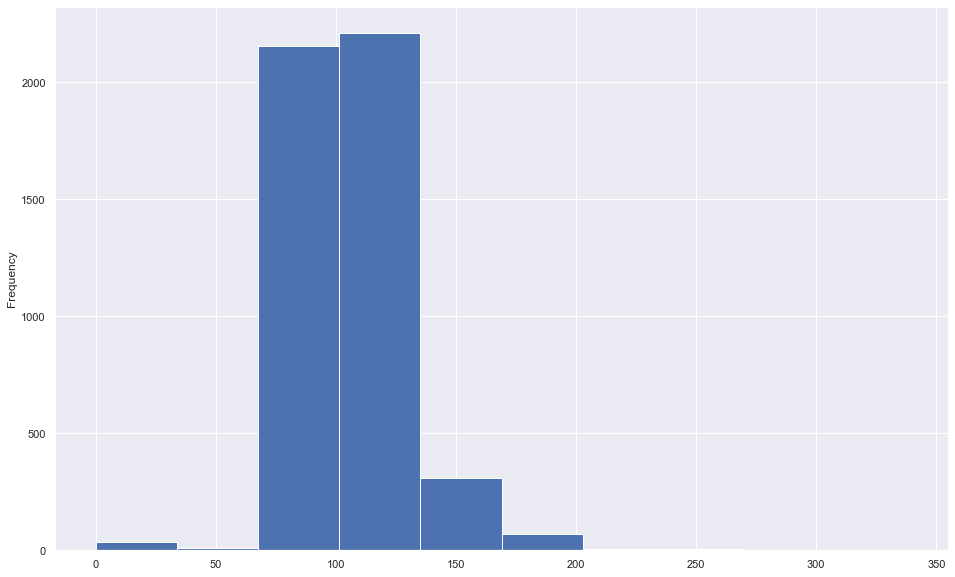

In [293]:
df['runtime'].plot(kind = 'hist');

In [294]:
sum(df['runtime'] == 0)

34

In [295]:
# dataset for 0 mins runtime
#runtime_title = df[['runtime','title']]
#runtime_title .loc[df['runtime']==0]

In [296]:
#  impute the mean of the runtime where the runtime is 0 with mean
# runtime_mean
runtime_mean = df['runtime'].mean()
df['runtime'].replace({0: runtime_mean}, inplace=True)

#### check

In [297]:
sum(df['runtime'] == 0)

0

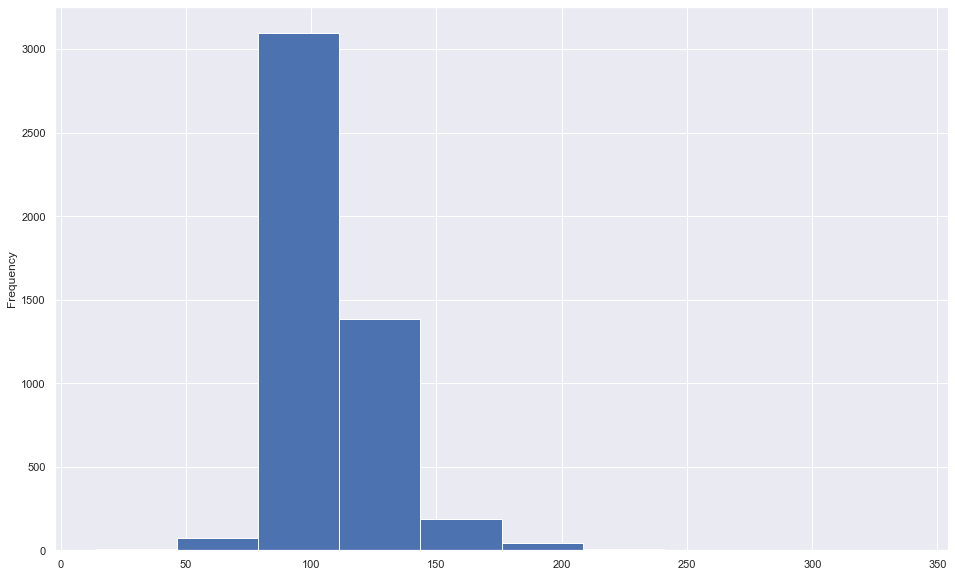

In [298]:
df['runtime'].plot(kind = 'hist');

The runtime graph looks a bit better now

<a id='votes'></a>
# Vote Count 

In [299]:
# drop bote averages as they are more by one instance

In [300]:
# dataset for 0 mins runtime
vote_average = df[['vote_average','title']]
votes_0 = vote_average .loc[df['vote_average']==0]

In [301]:
votes_0.head(2)

,vote_average,title
1464,0.0,Black Water Transit
3669,0.0,Should've Been Romeo


In [302]:
votes_0.drop(['vote_average','title'], axis=1, inplace=True )

C:\Users\Star\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [303]:
votes_0.head(2)

""
1464
3669


### drop all these values from the dataframe using their indicies

In [304]:
for row in votes_0.itertuples():
        for i in row:
            df.drop(index=i , inplace = True)

In [305]:
df.shape

(4740, 10)

In [306]:
sum(df['vote_average'] == 0)

0

In [307]:
desc_min = df.describe().loc[['min']]
desc_min

,budget,popularity,revenue,runtime,vote_average,vote_count,ROI_%,year
min,0.0,0.000372,0.0,14.0,0.5,1.0,-100.0,1916.0


#### Now the runtime, vote average, and vote count are all fixed

<a id='eda'></a>


# Exploring the Data

### count of movies over the years

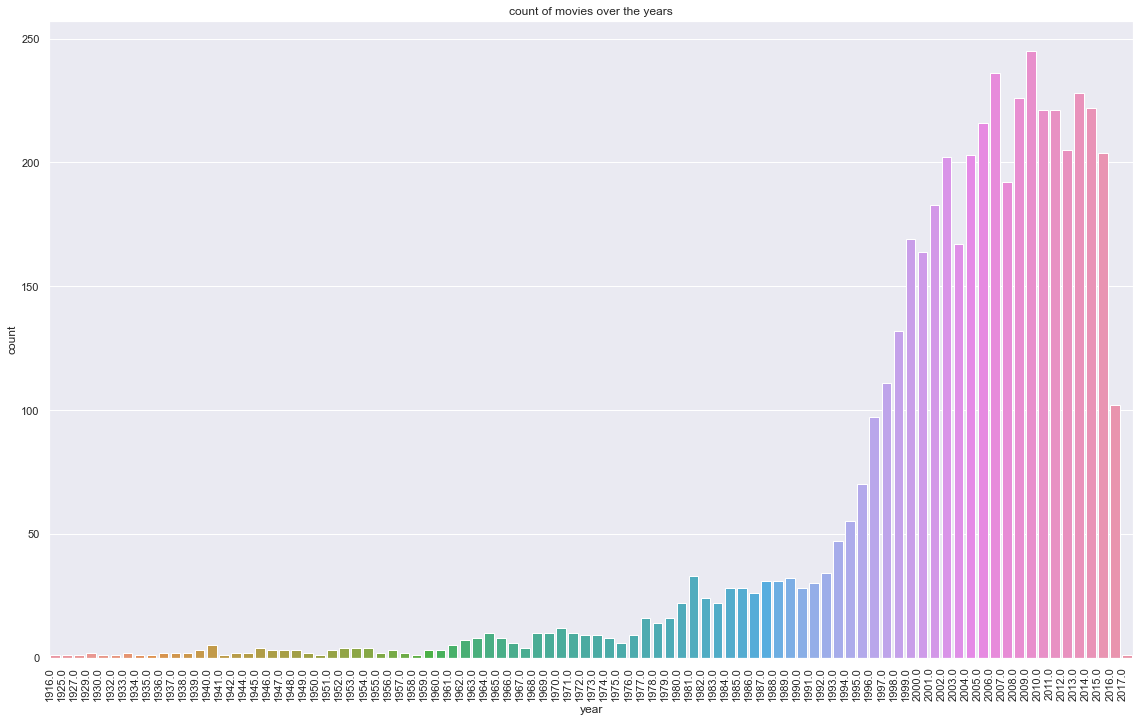

In [308]:
ax = sns.countplot(x="year", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.title("count of movies over the years")
plt.show()

the year with mot movies is 2009!

### checking for outliers

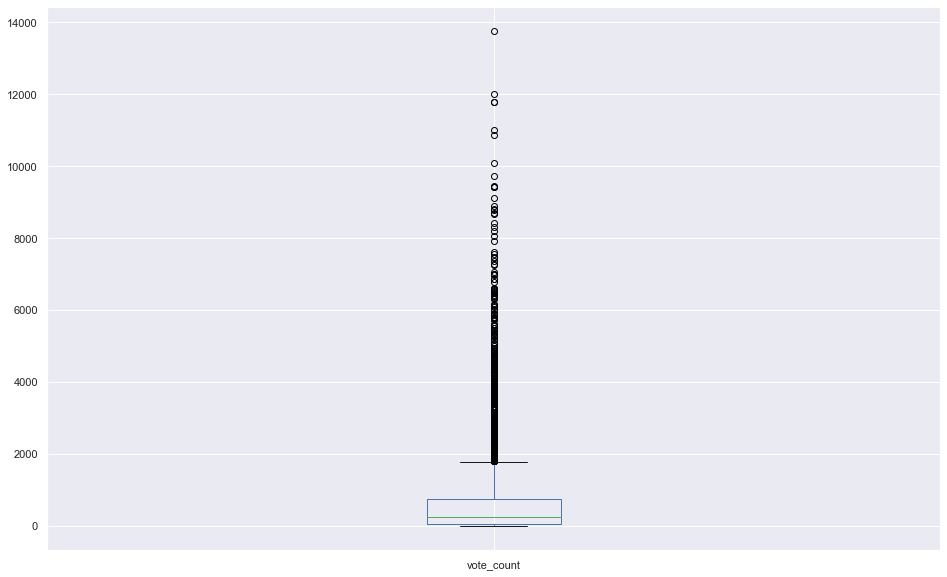

In [309]:
df['vote_count'].plot(kind = 'box');

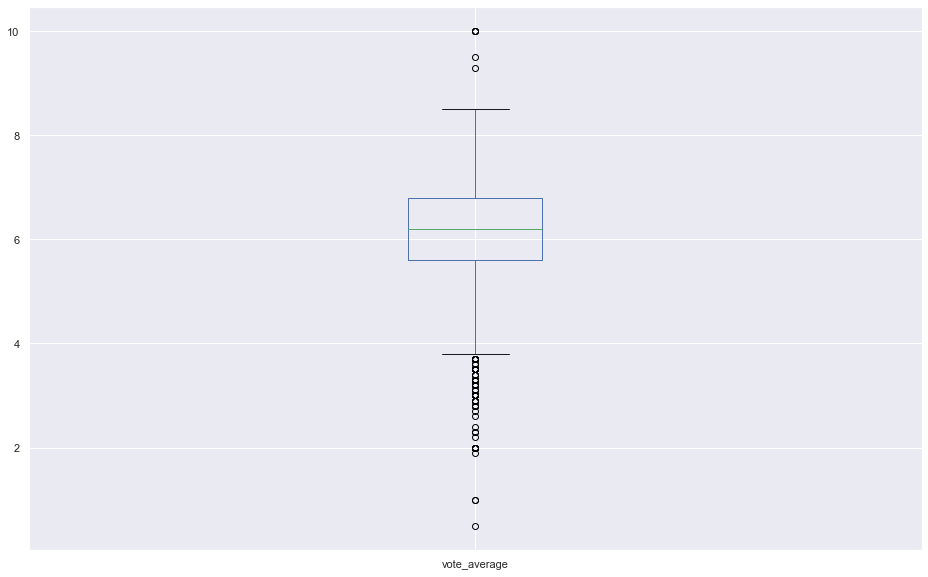

In [310]:
df['vote_average'].plot(kind = 'box');

This shows that the vote average will be balanced

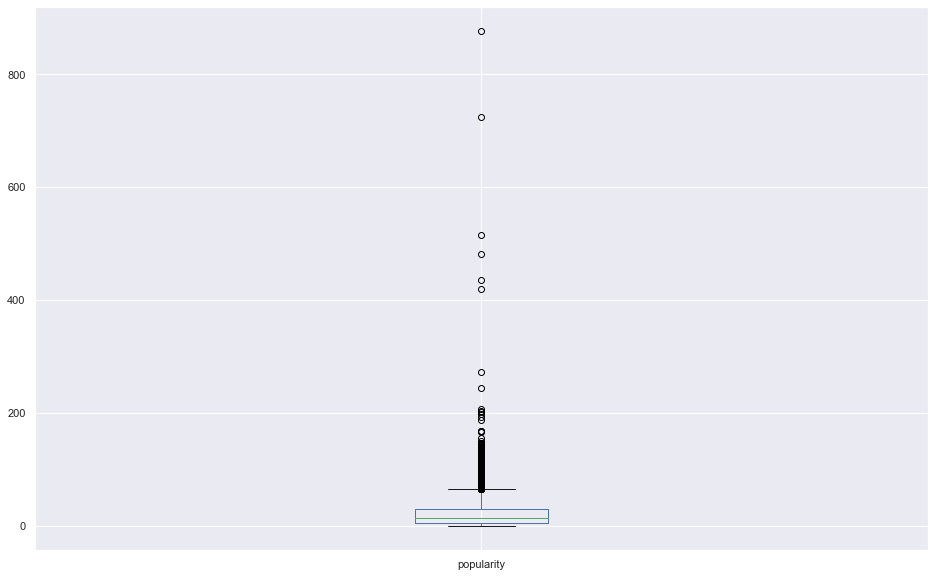

In [311]:
df['popularity'].plot(kind = 'box');

On the other hand, the popularity matrix is really skewed, which makes sense in this case as few of the movies out there are really popular , and the majority of the movies are not!


C:\Users\Star\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

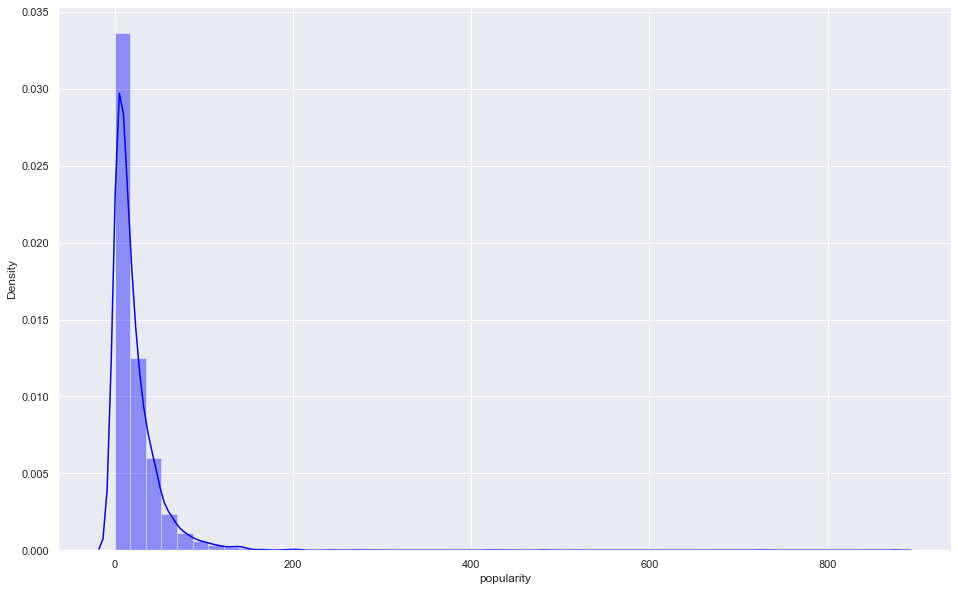

In [312]:
sns.distplot(df.popularity, color = 'blue', label = 'popularity')

<AxesSubplot:xlabel='year', ylabel='vote_average'>

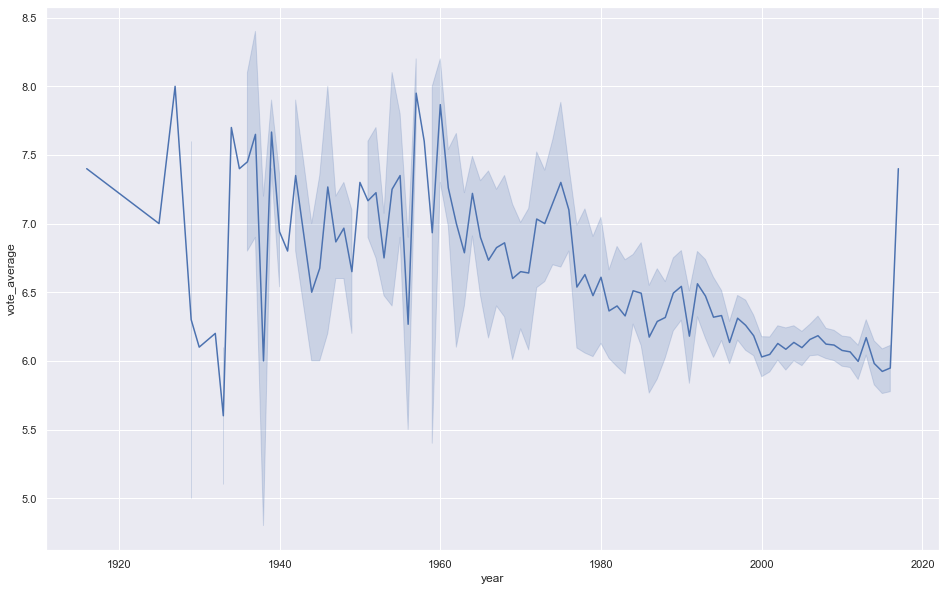

In [313]:
sns.lineplot(x='year',y='vote_average',data=df)

very right skewed!

This graph shows that the average rating of the movies has been steadily decreasing which indicates that more modern movies are of less quality than their predecessor

### Correlation between Popularity & runtime

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


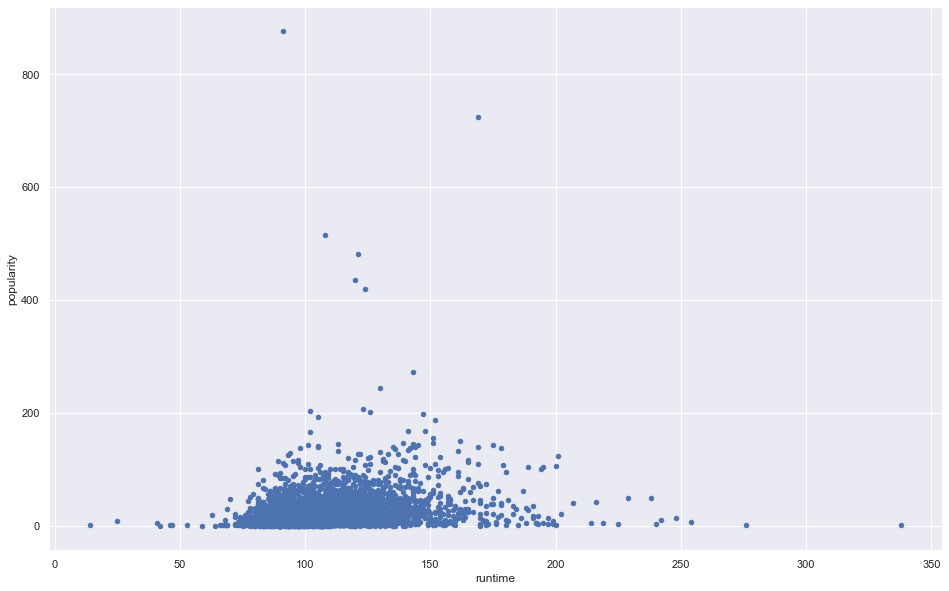

In [314]:
runt_pop_dist = df.plot.scatter(x='runtime', y='popularity')

this defenitly represent the sweet spot for movie runtime length
the best rutime range is between 75 and 200 minutes with 120 minutes being the optimal

## Highest Rated movie 

In [315]:
df.columns

Index(['budget', 'genres', 'popularity', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count', 'ROI_%', 'year'],
      dtype='object')

In [316]:
df.groupby('title')['vote_average'].mean().sort_values(ascending = False)

title
Dancer, Texas Pop. 81           10.0
Little Big Top                  10.0
Me You and Five Bucks           10.0
Stiff Upper Lips                10.0
Sardaarji                        9.5
                                ... 
The Little Ponderosa Zoo         2.0
Superbabies: Baby Geniuses 2     1.9
Gory Gory Hallelujah             1.0
All Hat                          1.0
Dwegons                          0.5
Name: vote_average, Length: 4737, dtype: float64

In [317]:
df.groupby('year')['vote_average'].mean().sort_values(ascending = False)

year
1927.0    8.000000
1957.0    7.950000
1960.0    7.866667
1934.0    7.700000
1939.0    7.666667
            ...   
2012.0    5.996098
2014.0    5.981081
2016.0    5.948039
2015.0    5.923039
1933.0    5.600000
Name: vote_average, Length: 90, dtype: float64

##### year with highest ratings

#### it seems that movie rating are on a downward slope, which suggests that recent movies are of lower quality than before, Furthermore looks like movie rating toped on average at year 1960

## Most Popular movie

In [318]:
df.groupby('title')['popularity'].mean().sort_values(ascending = False)

title
Minions                        875.581305
Interstellar                   724.247784
Deadpool                       514.569956
Guardians of the Galaxy        481.098624
Mad Max: Fury Road             434.278564
                                  ...    
Nothing But a Man                0.008453
Smiling Fish & Goat On Fire      0.007340
Love Letters                     0.001586
Penitentiary                     0.001117
Alien Zone                       0.000372
Name: popularity, Length: 4737, dtype: float64

#### year with most popular movies

In [319]:
df.groupby('year')['popularity'].mean().sort_values(ascending = False)

year
1975.0    47.491443
1942.0    45.690500
1939.0    42.887497
1937.0    42.096336
1957.0    41.184582
            ...    
1933.0     1.278059
1932.0     1.199451
1925.0     0.785744
2017.0     0.710870
1944.0     0.579748
Name: popularity, Length: 90, dtype: float64

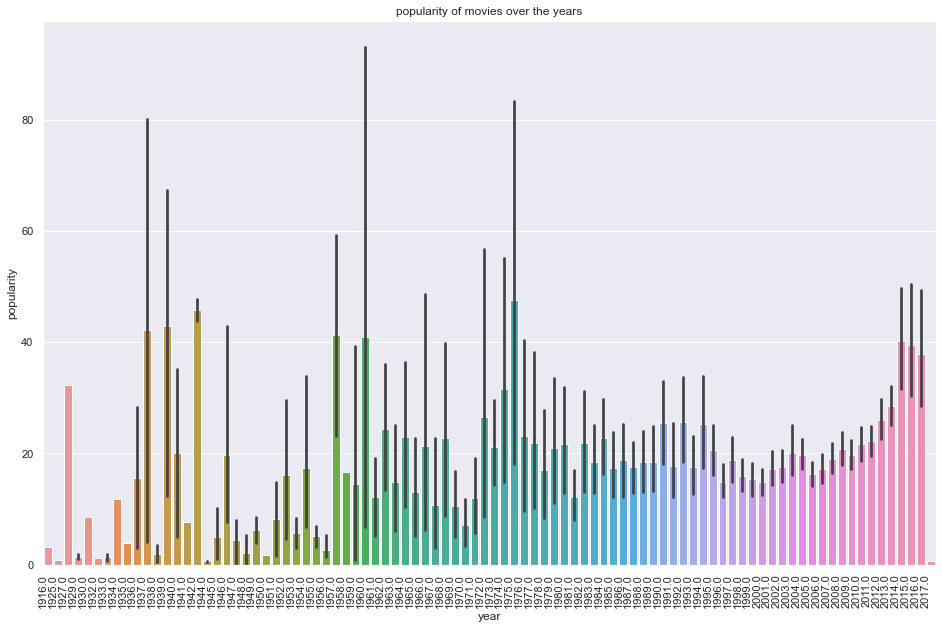

In [320]:
years_pop = sns.barplot(x='year',y='popularity',data=df)

years_pop.set_xticklabels(years_pop.get_xticklabels(), rotation=90, ha="right")
#plt.tight_layout()
plt.title("popularity of movies over the years")
plt.show()


the most popular year for movies on average was 1960, followed by the year 1975, followed by the year 1937
the least popular years range from 1930s to the 1960s

<AxesSubplot:xlabel='year', ylabel='popularity'>

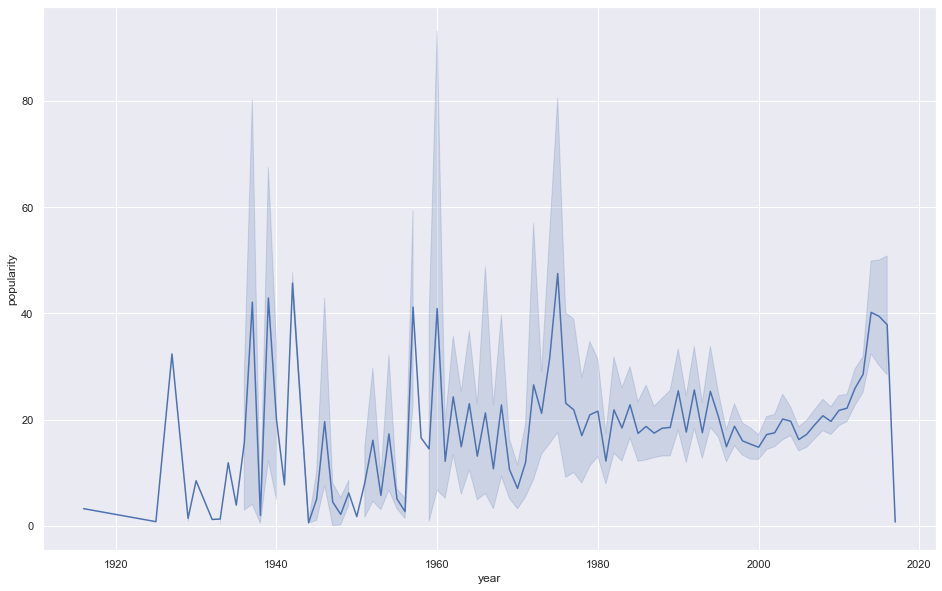

In [321]:
sns.lineplot(x='year',y='popularity',data=df)

#### the years 1960 and 1975 have the most popular movies on average, which is not very different than the vote rating graph

In [322]:
df.columns

Index(['budget', 'genres', 'popularity', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count', 'ROI_%', 'year'],
      dtype='object')

### correlation between popularity & rating

In [323]:
#pd.plotting.scatter_matrix(df[['popularity','vote_average']], figsize = (8,8));

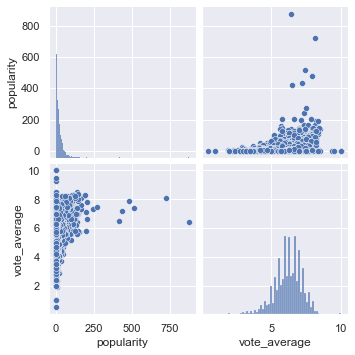

In [324]:
sns.pairplot(df[['popularity','vote_average']])

#### there seems to be a correlation although not a very strong oone between the vote average and the popularity

### Movie runtimes

In [325]:
# 5 longest movies titles
long_10 = df.nlargest(5,'runtime')[['title','runtime']]
print(long_10)

            title  runtime
2384       Carlos    338.0
2631  The Company    276.0
1922   Gettysburg    254.0
1125    Cleopatra    248.0
2373       Hamlet    242.0


In [326]:
# 5 shortest movies titles
small_10 = df.nsmallest(5,'runtime')[['title','runtime']]
print(small_10)

                                           title  runtime
4466                                      Vessel     14.0
4709                   A Charlie Brown Christmas     25.0
3626  Sea Rex 3D: Journey to a Prehistoric World     41.0
3471    Dolphins and Whales: Tribes of the Ocean     42.0
3354                   Michael Jordan to the Max     46.0


<a id='profits'></a>

# Profits Analysis
### budget, revenue & return on invesment

In [327]:
#create a new dataframe
profits = pd.DataFrame()
profits = df.copy()

In [328]:
profits.head(1)

,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,ROI_%,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,2787965087,162.0,Avatar,7.2,11800,1076.0,2009.0


In [329]:
profits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4740 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4740 non-null   int64  
 1   genres        4740 non-null   object 
 2   popularity    4740 non-null   float64
 3   revenue       4740 non-null   int64  
 4   runtime       4740 non-null   float64
 5   title         4740 non-null   object 
 6   vote_average  4740 non-null   float64
 7   vote_count    4740 non-null   int64  
 8   ROI_%         3902 non-null   float64
 9   year          4740 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 536.4+ KB


8   ROI_%         3902 non-null   float64
return on invesment have a lot of null values

In [330]:
print(sum(profits['budget'] == 0))
print(sum(profits['revenue'] == 0))

985
1366


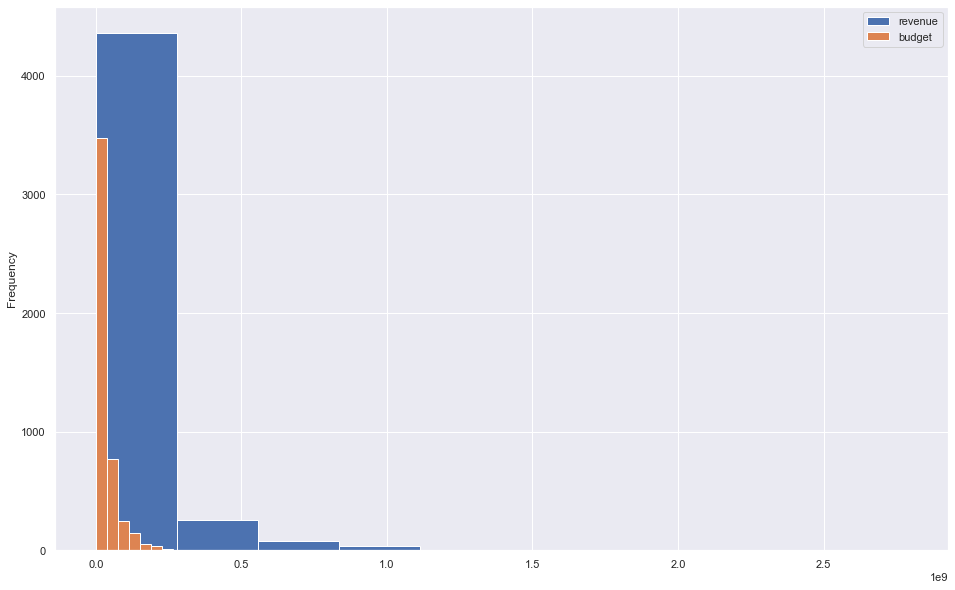

In [331]:
profits['revenue'].plot(kind = 'hist');
profits['budget'].plot(kind = 'hist');
plt.legend()


As expected the distribitions are heavly right skewed, due to all of the values are 0, which doesn't make sense

#### check the means

In [332]:
print(profits['budget'].mean())
print(profits['revenue'].mean())

29429360.762658227
83353973.33459915


### replace 0 values  with Nan

In [333]:
profits['budget'].replace({0: pd.NA}, inplace=True)
profits['revenue'].replace({0: pd.NA}, inplace=True)

In [334]:
print(sum(profits['budget'] == 0))
print(sum(profits['revenue'] == 0))

0
0


In [335]:
profits[['revenue','budget']].isnull().sum()

revenue    1366
budget      985
dtype: int64

### drop all null values

In [336]:
profits.dropna(inplace =True)

In [337]:
profits.shape

(3227, 10)

In [338]:
profits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3227 entries, 0 to 4798
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        3227 non-null   object 
 1   genres        3227 non-null   object 
 2   popularity    3227 non-null   float64
 3   revenue       3227 non-null   object 
 4   runtime       3227 non-null   float64
 5   title         3227 non-null   object 
 6   vote_average  3227 non-null   float64
 7   vote_count    3227 non-null   int64  
 8   ROI_%         3227 non-null   float64
 9   year          3227 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 277.3+ KB


## This new dataframe is fixed with all value are non-null and not 0

In [339]:
profits.describe()

,popularity,runtime,vote_average,vote_count,ROI_%,year
count,3227.000000,3227.000000,3227.000000,3227.000000,3.227000e+03,3227.000000
mean,29.051491,110.720793,6.313263,977.893090,2.955654e+05,2001.677099
std,36.169863,20.970364,0.859921,1414.538507,1.506568e+07,13.281486
min,0.019984,41.000000,2.300000,1.000000,-1.000000e+02,1916.000000
25%,10.475904,96.000000,5.800000,178.000000,3.000000e+00,1998.000000
50%,20.415572,107.000000,6.300000,471.000000,1.300000e+02,2005.000000
75%,37.345773,121.000000,6.900000,1148.000000,3.420000e+02,2010.000000
max,875.581305,338.000000,8.500000,13752.000000,8.499999e+08,2016.000000


#### no min values are 0 !!

#### check the means again!

In [340]:
print(profits['budget'].mean())
print(profits['revenue'].mean())

40678773.52835451
121318095.80384257


they now a bit are improved!

## now plot all histograms for all variables

Text(0.5, 1.0, ' histogram of all variables')

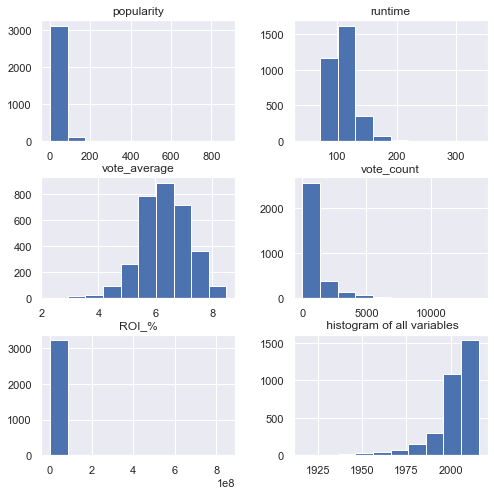

In [341]:
profits.hist(figsize = (8,8));
plt.title(" histogram of all variables")

In [342]:
# sns.pairplot(profits)

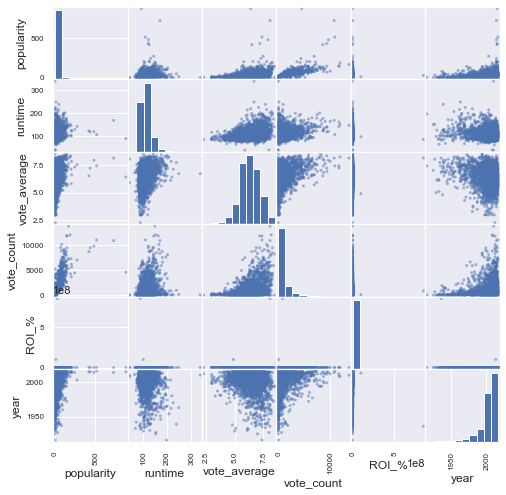

In [343]:
pd.plotting.scatter_matrix(profits, figsize = (8,8));
#plt.title(" correlation matrix between all variables")

Text(0.5, 1.0, ' all variables box diagram')

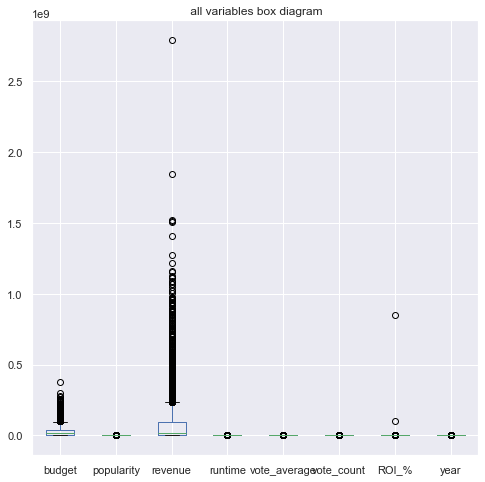

In [344]:
df.plot.box(figsize = (8,8));
plt.title(" all variables box diagram")

## few insights from the box plot
1.
2.
3.
4.

In [345]:
profits.groupby('title')['ROI_%'].max().sort_values(ascending = False)

title
Modern Times                                  849999900.0
Nurse 3-D                                      99999900.0
Paranormal Activity                             1288939.0
Tarnation                                        532934.0
The Blair Witch Project                          413233.0
                                                 ...     
The Adventurer: The Curse of the Midas Box         -100.0
Janky Promoters                                    -100.0
Dreaming of Joseph Lees                            -100.0
The Cookout                                        -100.0
In the Cut                                         -100.0
Name: ROI_%, Length: 3226, dtype: float64

#### will remove the highest 2 profitable movies as they distort the the graph by much, thus will be considered outliers

In [346]:
profits['ROI_%'] = profits['ROI_%'].mask(profits['ROI_%'] > 1288939.0, pd.NA)
profits.dropna(inplace =True)

Text(0.5, 1.0, ' profits box diagram')

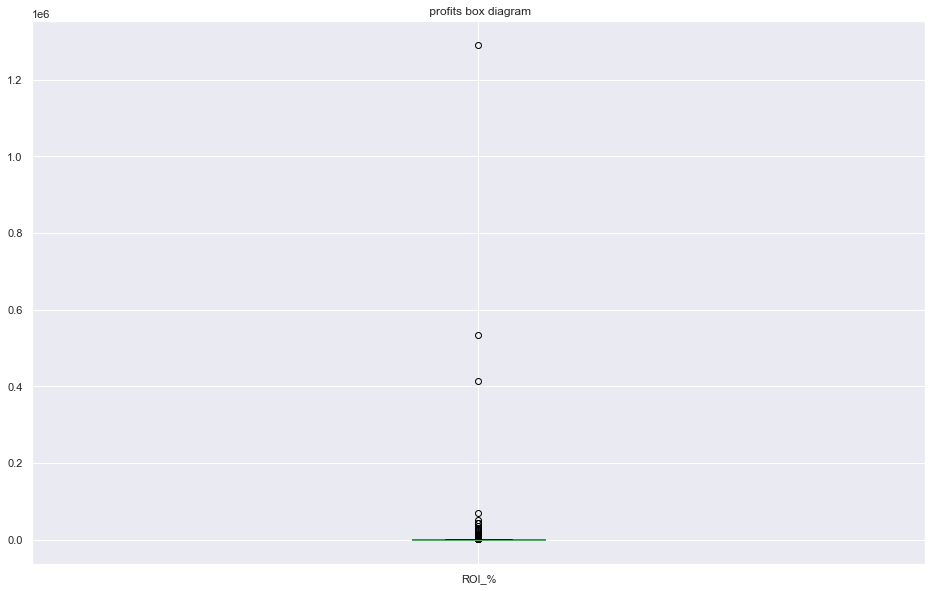

In [347]:
profits['ROI_%'].plot(kind = 'box');
plt.title(" profits box diagram")

In [348]:
# fix data type in order for the mean() method to work properly

profits["revenue"] = pd.to_numeric(profits["revenue"], downcast="float")
profits["budget"] = pd.to_numeric(profits["budget"], downcast="float")
profits["ROI_%"] = pd.to_numeric(profits["ROI_%"], downcast="float")

In [349]:
profits.groupby('title')['ROI_%'].max().sort_values(ascending = False)

title
Paranormal Activity                           1288939.0
Tarnation                                      532934.0
The Blair Witch Project                        413233.0
Eraserhead                                      69900.0
Pink Flamingos                                  49900.0
                                                ...    
The Adventurer: The Curse of the Midas Box       -100.0
In the Cut                                       -100.0
Death at a Funeral                               -100.0
Janky Promoters                                  -100.0
Foodfight!                                       -100.0
Name: ROI_%, Length: 3224, dtype: float32

## Paranormal Activity is the most profitable film ever!!

In [350]:
profits[profits["title"] == "Paranormal Activity"]

,budget,genres,popularity,revenue,runtime,title,vote_average,vote_count,ROI_%,year
4577,15000.0,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",47.456823,193355808.0,86.0,Paranormal Activity,5.9,1316,1288939.0,2007.0


the profits are a staggering 1288939.0 % & the movie is actually popular,
despite its below average rating!!

### although Paranormal Activity  is very profitable, yet it seems that its budget doesn't make alot of sense!

### will atempt to count then drop  all ROIs larger than 10000%, to check if the results will be more realistic!

In [351]:
profits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3225 entries, 0 to 4798
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        3225 non-null   float32
 1   genres        3225 non-null   object 
 2   popularity    3225 non-null   float64
 3   revenue       3225 non-null   float32
 4   runtime       3225 non-null   float64
 5   title         3225 non-null   object 
 6   vote_average  3225 non-null   float64
 7   vote_count    3225 non-null   int64  
 8   ROI_%         3225 non-null   float32
 9   year          3225 non-null   float64
dtypes: float32(3), float64(4), int64(1), object(2)
memory usage: 239.4+ KB


In [352]:
profits['ROI_%'] = profits['ROI_%'].mask(profits['ROI_%'] > 10000, pd.NA)
print(profits['ROI_%'].isna().sum())

23


In [353]:
profits.dropna(inplace =True)

Text(0.5, 1.0, ' profits box diagram')

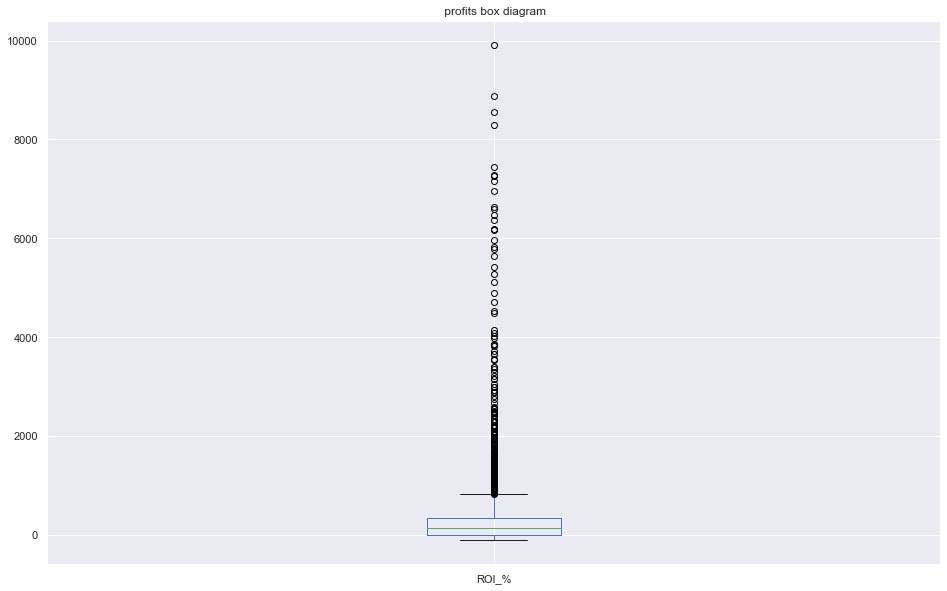

In [354]:
profits['ROI_%'].plot(kind = 'box');
plt.title(" profits box diagram")

In [355]:
# fix data type in order for the mean() method to work properly

profits["revenue"] = pd.to_numeric(profits["revenue"], downcast="float")
profits["budget"] = pd.to_numeric(profits["budget"], downcast="float")
profits["ROI_%"] = pd.to_numeric(profits["ROI_%"], downcast="float")

### the outliers in ROI% are now dealt with properly

In [356]:
profits.groupby('title')['ROI_%'].mean().sort_values(ascending = False)

title
Gone with the Wind                             9904.0
The Big Parade                                 8880.0
Saw                                            8559.0
The Evil Dead                                  8300.0
E.T. the Extra-Terrestrial                     7452.0
                                                ...  
Death at a Funeral                             -100.0
Strangerland                                   -100.0
An Alan Smithee Film: Burn, Hollywood, Burn    -100.0
Chasing Liberty                                -100.0
The Adventurer: The Curse of the Midas Box     -100.0
Name: ROI_%, Length: 3201, dtype: float32

### the 10 most successfull movies:


In [357]:
successes = profits.nlargest(10,'ROI_%')[['title','ROI_%','budget','revenue','popularity','vote_average','year']]
successes

,title,ROI_%,budget,revenue,popularity,vote_average,year
3813,Gone with the Wind,9904.0,4000000.0,400176448.0,48.982550,7.7,1939.0
4661,The Big Parade,8880.0,245000.0,22000000.0,0.785744,7.0,1925.0
4291,Saw,8559.0,1200000.0,103911672.0,63.655973,7.2,2004.0
4595,The Evil Dead,8300.0,350000.0,29400000.0,35.037625,7.3,1981.0
2967,E.T. the Extra-Terrestrial,7452.0,10500000.0,792910528.0,56.105798,7.3,1982.0
3593,My Big Fat Greek Wedding,7275.0,5000000.0,368744032.0,18.115566,6.2,2002.0
3824,The Full Monty,7267.0,3500000.0,257850128.0,17.002623,6.8,1997.0
4672,A Fistful of Dollars,7150.0,200000.0,14500000.0,38.771062,7.6,1964.0
2912,Star Wars,6949.0,11000000.0,775398016.0,126.393695,8.1,1977.0
2809,Jaws,6624.0,7000000.0,470654016.0,50.152327,7.5,1975.0


In [358]:
successes['vote_average'].mean()

7.2700000000000005

In [359]:
successes['popularity'].mean()

45.5002963

### top 5 failling movies

In [360]:
flops = profits.nsmallest(5,'ROI_%')[['title','ROI_%','budget','revenue','popularity','vote_average','year']]
flops

,title,ROI_%,budget,revenue,popularity,vote_average,year
1101,Foodfight!,-100.0,65000000.0,73706.0,5.258726,2.3,2012.0
1655,Chasing Liberty,-100.0,23000000.0,12.0,3.362045,6.1,2004.0
1672,1911,-100.0,30000000.0,108348.0,4.065212,5.0,2011.0
1999,The Adventurer: The Curse of the Midas Box,-100.0,25000000.0,6399.0,8.842722,5.1,2013.0
2068,Death at a Funeral,-100.0,9000000.0,46.0,20.410354,6.9,2007.0


In [361]:
flops['vote_average'].mean()

5.08

In [362]:
flops['popularity'].mean()

8.3878118

## Most profitable years

In [363]:
profits.groupby('year')['ROI_%'].mean().sort_values(ascending = False)

year
1925.0    8880.000000
1939.0    3853.333252
1975.0    2450.000000
1916.0    2075.000000
1964.0    2054.500000
             ...     
1936.0     128.000000
1950.0     112.000000
1930.0     103.000000
1948.0      90.000000
1927.0     -99.000000
Name: ROI_%, Length: 88, dtype: float32

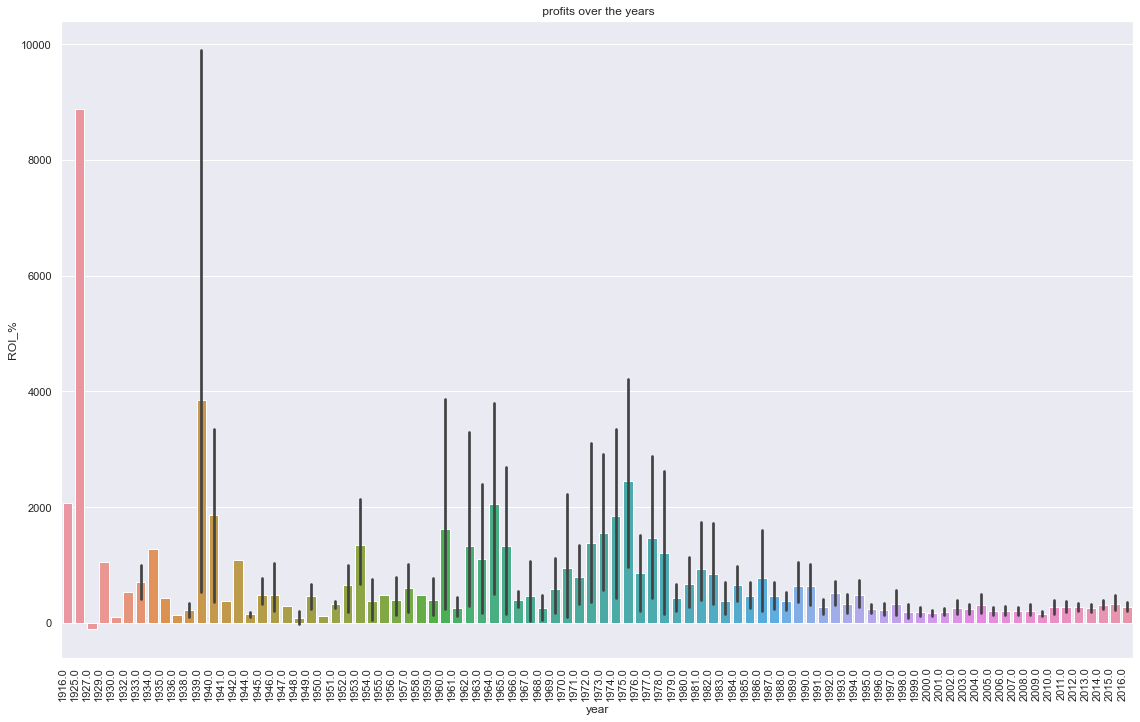

In [364]:
years_prof = sns.barplot(x='year',y='ROI_%',data=profits)

years_prof .set_xticklabels(years_prof.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.title(" profits over the years")
plt.show()


the most profitable years are 1939and 1925, and the are far ahead of all other movies.
**the budget and revenue of the associated movies are in terms of 2010 dollars, accounting for inflation over time.**
The more realistic range, that wouldnt be affected greatly by this financial adjusment would be the mid seventies!! 

Text(0.5, 1.0, ' profits over the years')

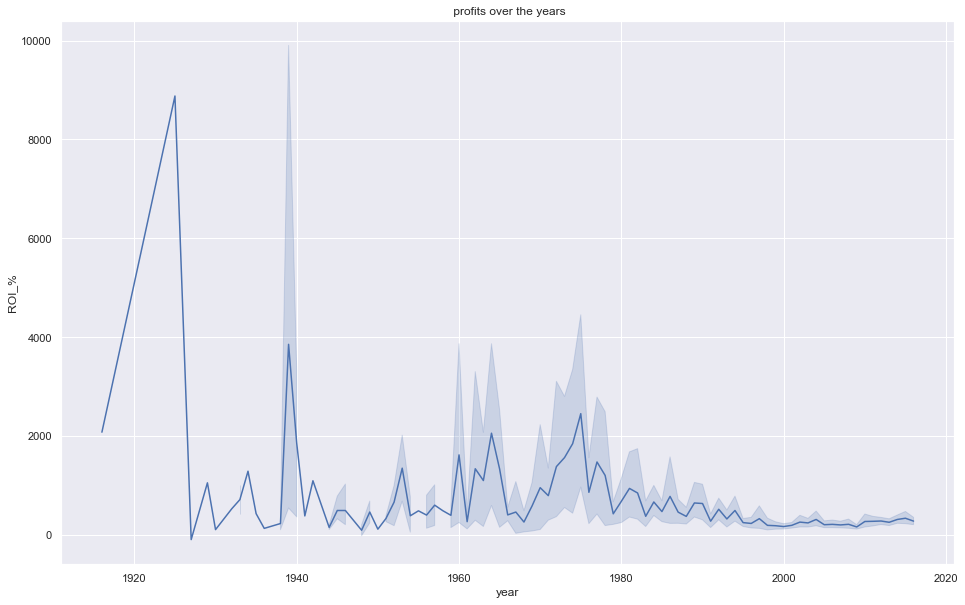

In [365]:
sns.lineplot(x='year',y='ROI_%',data=profits)
plt.title(" profits over the years")

In [366]:
#sns.barplot (x = 'title',y = 'runtime', data = long_10  )

## Correlations with budget, revenue & ROI

In [367]:
profits.columns

Index(['budget', 'genres', 'popularity', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count', 'ROI_%', 'year'],
      dtype='object')

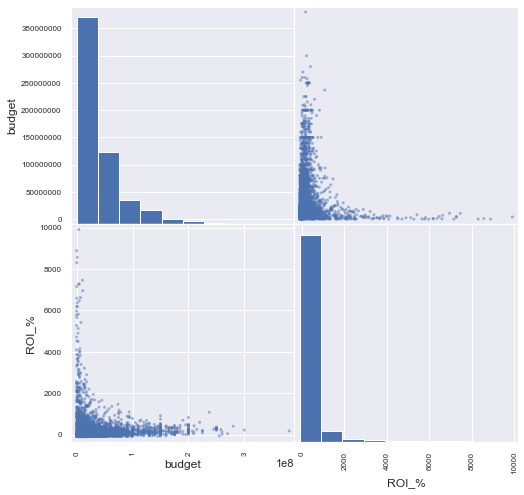

In [368]:
pd.plotting.scatter_matrix(profits[['budget','ROI_%']], figsize = (8,8));

### there is no correlation between budget and returns, spending more doesn't guarantee more profits

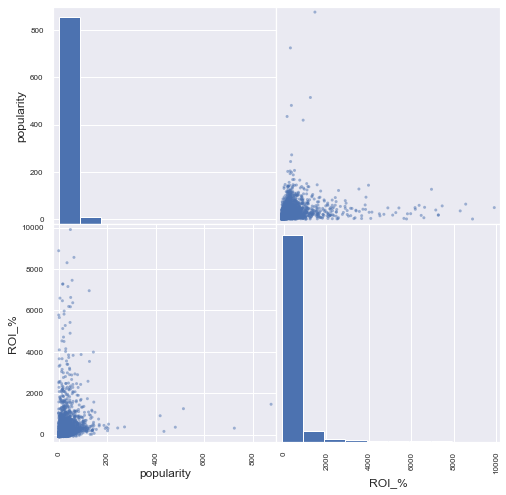

In [369]:
pd.plotting.scatter_matrix(profits[['popularity','ROI_%']], figsize = (8,8));

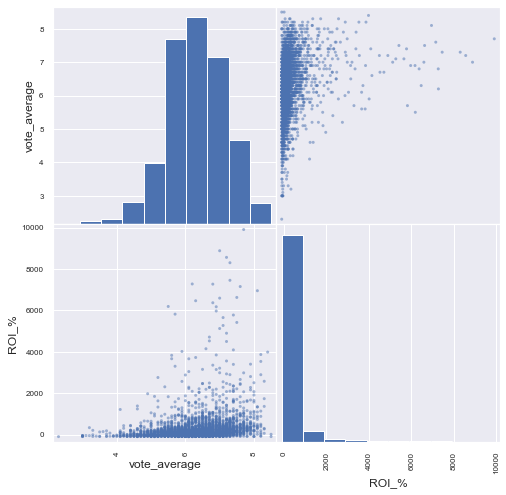

In [370]:
# should be ROI not revenue
pd.plotting.scatter_matrix(profits[['vote_average','ROI_%']], figsize = (8,8));

this is a very interesting founding, this scatter plot indicates higher ratings produce the higher returns,

In [371]:
profits.columns

Index(['budget', 'genres', 'popularity', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count', 'ROI_%', 'year'],
      dtype='object')

Text(0.5, 1.0, ' popularity  vs vote_average ')

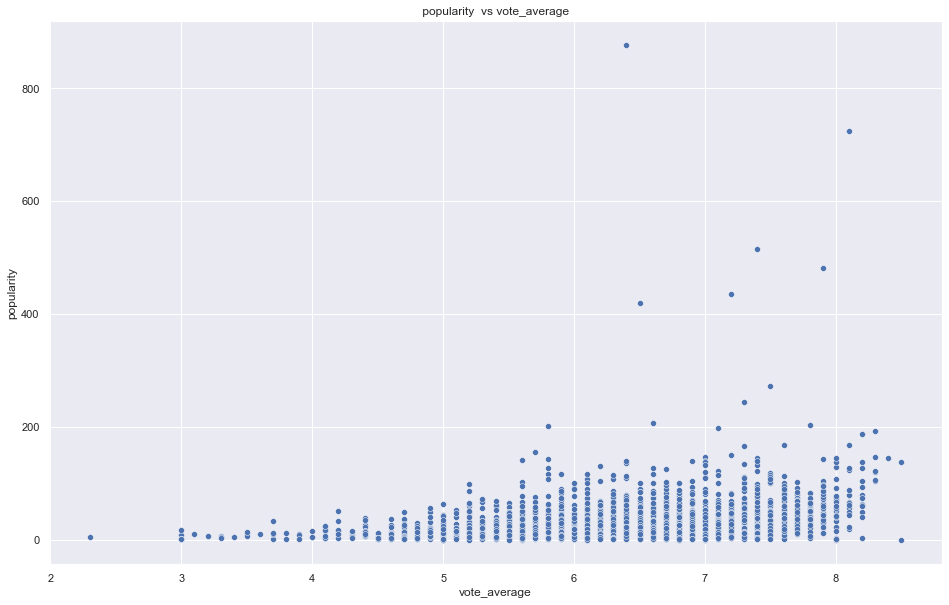

In [372]:
sns.scatterplot(y ='popularity', x = 'vote_average' ,data = profits )
plt.title(" popularity  vs vote_average ")

Text(0.5, 1.0, ' popularity  vs revenue ')

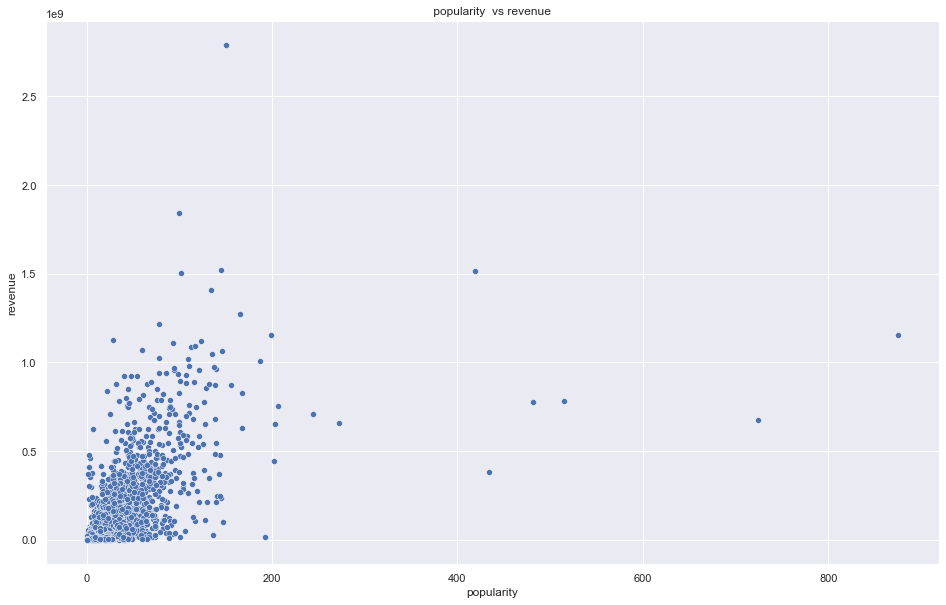

In [373]:
sns.scatterplot(x ='popularity', y = 'revenue' ,data = profits )
plt.title(" popularity  vs revenue ")

Text(0.5, 1.0, ' vote count  vs revenue ')

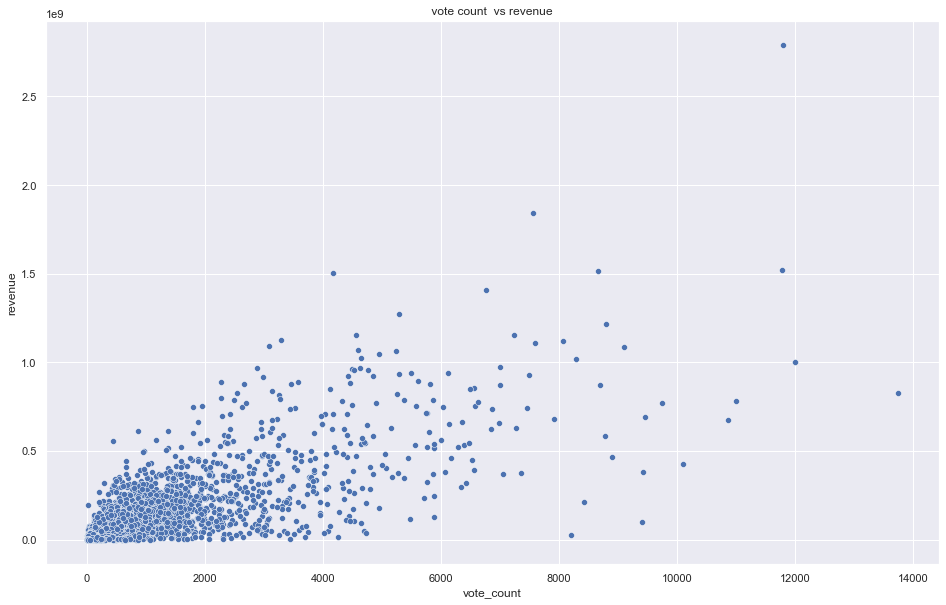

In [374]:
sns.scatterplot(x ='vote_count', y = 'revenue' ,data = profits )
plt.title(" vote count  vs revenue ")

<a id='gen'></a>
# Genre Analysis

In [375]:
#sns.pairplot(df)

In [376]:
df.shape

(4740, 10)

#### will work with the clean dataset with no 0s or null values

In [377]:
profits.shape

(3202, 10)

In [378]:
gdf = profits.copy()

In [379]:
gdf.shape

(3202, 10)

In [380]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3202 entries, 0 to 4798
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        3202 non-null   float32
 1   genres        3202 non-null   object 
 2   popularity    3202 non-null   float64
 3   revenue       3202 non-null   float32
 4   runtime       3202 non-null   float64
 5   title         3202 non-null   object 
 6   vote_average  3202 non-null   float64
 7   vote_count    3202 non-null   int64  
 8   ROI_%         3202 non-null   float32
 9   year          3202 non-null   float64
dtypes: float32(3), float64(4), int64(1), object(2)
memory usage: 366.7+ KB


Text(0.5, 1.0, ' Histogram fro all variables')

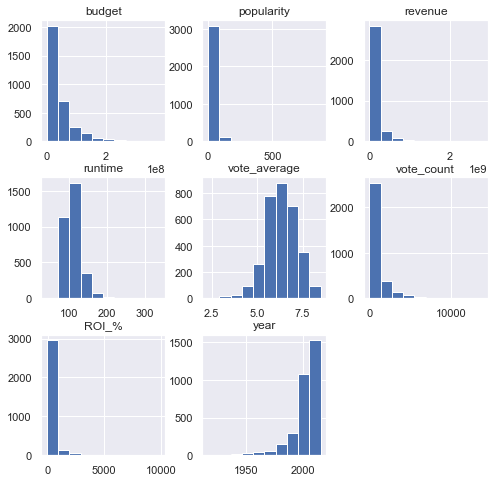

In [381]:
gdf.hist(figsize = (8,8));
plt.title(" Histogram fro all variables")

# Genre Data Parsing


In [382]:
# check generes data type
print(type(gdf["genres"][0]))

<class 'str'>


In [383]:
'''fix the jason object and change its datatype from string to
 list to extract the key value pairs'''

def clean_json(x):
    "Create apply function for decoding JSON"
    return json.loads(x)

gdf['genres'] = gdf['genres'].apply(clean_json)

In [384]:
gdf.columns

Index(['budget', 'genres', 'popularity', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count', 'ROI_%', 'year'],
      dtype='object')

In [385]:
print(type(gdf["genres"][0]))

<class 'list'>


In [386]:
gdf['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [387]:
#fetch all unique movies genres values in our data frame
#through iterating through the rows of the new dataframe 
#then the attributes in each row to get the genres coulumn
#the coulumn is a list, itterate through list to get different dictionaries
#from dictionaries ket value of the key 'name'
#and assigning them to a set to get unique values without duplicates

#for row in genres.itertuples( ):
gen  = []
for row in gdf.itertuples():
        for i in row:
            if type(i) == list:
                for j in i:
                    #print(j.get('name'))
                    gen.append(j.get('name'))
gen = set(gen)
print (gen)
print (len(gen))
#print(type(gen))

{'Foreign', 'History', 'War', 'Fantasy', 'Animation', 'Crime', 'Romance', 'Thriller', 'Music', 'Science Fiction', 'Family', 'Documentary', 'Adventure', 'Drama', 'Western', 'Mystery', 'Action', 'Horror', 'Comedy'}
19


These are all the genres or unique movie types
* A note here, is that there was an 20th genre " TV movies"
yet it was dropped, when we dropped null and zero values

### Create new data frames, one for each genre


### Turn the set of genres into a dictionary

In [388]:
# where the genre names are the keys, and the data corresponding to it 
# are the values saved as lists
y = {g : [] for g in gen}
print(y)

{'Foreign': [], 'History': [], 'War': [], 'Fantasy': [], 'Animation': [], 'Crime': [], 'Romance': [], 'Thriller': [], 'Music': [], 'Science Fiction': [], 'Family': [], 'Documentary': [], 'Adventure': [], 'Drama': [], 'Western': [], 'Mystery': [], 'Action': [], 'Horror': [], 'Comedy': []}


In [389]:
y.get('Adventure')

[]

Adventure genre is now an empty list

In [390]:
# for each key in the dictionary y or each "genre name"
# check if the row in the movie dataframe contains this genre
# if so, add this row to the list corresponding to the genre name 
# in the y dictionary
for genre in y:
    for row in gdf.itertuples():
        for i in row:
            # the only attribute type "list is the genre attribute
            if type(i) == list:
                for j in i:
                    if j.get('name') == genre:
                        (y.get(genre)).append(row)

In [391]:
print(len(y.get('Adventure')))

660


Now Adventure is a list with 660 instances,
660 of all the instances in the original dataset, contained movies with the Adventure genre!

In [392]:
#change the name of the genre "science fiction"
#as the key names will be used later as variabled assigned to dataframes
#"science fiction"will be Scifi
# and update the set "gen" as well to list with Scifi instead of "science fiction"

y['Scifi'] = y. pop('Science Fiction')
genres = []
for i in gen:
    if i == 'Science Fiction':
        genres.append(" Scifi ")
    else:
        genres.append(i)
            
print (genres , len(genres))

['Foreign', 'History', 'War', 'Fantasy', 'Animation', 'Crime', 'Romance', 'Thriller', 'Music', ' Scifi ', 'Family', 'Documentary', 'Adventure', 'Drama', 'Western', 'Mystery', 'Action', 'Horror', 'Comedy'] 19


In [393]:
print(len(y.get('Scifi')))

429


In [394]:
#print all the genres, there count and there percentage from all movies in the dataset
for i in y:
    perc = ((len(y.get(i)) / 3227) * 100)
    print(i,('-----'),("count is: %3.0f" % len(y.get(i))),('-------'),("Perc. is : %5.2f" % (perc)))

Foreign ----- count is:   5 ------- Perc. is :  0.15
History ----- count is: 145 ------- Perc. is :  4.49
War ----- count is: 120 ------- Perc. is :  3.72
Fantasy ----- count is: 340 ------- Perc. is : 10.54
Animation ----- count is: 186 ------- Perc. is :  5.76
Crime ----- count is: 519 ------- Perc. is : 16.08
Romance ----- count is: 572 ------- Perc. is : 17.73
Thriller ----- count is: 929 ------- Perc. is : 28.79
Music ----- count is: 110 ------- Perc. is :  3.41
Family ----- count is: 363 ------- Perc. is : 11.25
Documentary ----- count is:  36 ------- Perc. is :  1.12
Adventure ----- count is: 660 ------- Perc. is : 20.45
Drama ----- count is: 1428 ------- Perc. is : 44.25
Western ----- count is:  57 ------- Perc. is :  1.77
Mystery ----- count is: 263 ------- Perc. is :  8.15
Action ----- count is: 916 ------- Perc. is : 28.39
Horror ----- count is: 322 ------- Perc. is :  9.98
Comedy ----- count is: 1103 ------- Perc. is : 34.18
Scifi ----- count is: 429 ------- Perc. is : 13.2

### Turn the "y" dictionary to seperate lists


In [395]:
locals().update(y)
print(type(Adventure ))

<class 'list'>


#### Create a list of these lists

In [396]:
genres_list = [Thriller ,Fantasy ,Western ,Family ,History ,Romance ,Foreign,Horror,Drama,War,Music,Mystery,Action ,Animation ,Comedy ,Documentary ,Adventure , Crime , Scifi ]
print(type(genres_list [0]))

<class 'list'>


In [397]:
# couldn't us this method as the lists would change to dataframes
#yet they would remain local variables
#couldnt find a way to turn these local variables in a list into global variables
"""
genres_df =[]
for i in genres_list:
    i = pd.DataFrame(i)
    genres_df.append(i)
    
print(type(i))
len(genres_df)

# all lists inside genres_list have changed types to  dataframes
# yet they can't be accessed individually, globaly!!

"""

"\ngenres_df =[]\nfor i in genres_list:\n    i = pd.DataFrame(i)\n    genres_df.append(i)\n    \nprint(type(i))\nlen(genres_df)\n\n# all lists inside genres_list have changed types to  dataframes\n# yet they can't be accessed individually, globaly!!\n\n"

#### the code above was an attempt to avoid the repetetive code below

In [398]:

## Assign all lists of genres to dataframes!
Thriller  = pd.DataFrame(Thriller)
Fantasy   = pd.DataFrame(Fantasy )
Western     = pd.DataFrame(Western )
Family    = pd.DataFrame(Family )
History  = pd.DataFrame(History )
Romance  = pd.DataFrame(Romance )
Foreign  = pd.DataFrame(Foreign )
Horror  = pd.DataFrame(Horror )
Drama   = pd.DataFrame(Drama )
War  = pd.DataFrame(War )
Music = pd.DataFrame(Music)
Mystery = pd.DataFrame(Mystery)
Action  = pd.DataFrame(Action )
Animation  = pd.DataFrame(Animation )
Comedy = pd.DataFrame(Comedy)
Documentary = pd.DataFrame(Documentary )
Adventure = pd.DataFrame(Adventure )
Crime = pd.DataFrame(Crime )
Scifi  = pd.DataFrame(Scifi  )

# Create a new dataframe to analyse the means of all the Genres

#### Get the mean of any Dataframe just to create the shape of the new Dataframe

In [399]:
Thriller_desc = Thriller.describe()
Thriller_desc = Thriller_desc.loc[['mean']]

In [400]:
genre_analysis = Thriller_desc.head(0)

In [401]:
genre_analysis.head()

,Index,budget,popularity,revenue,runtime,vote_average,vote_count,_9,year


In [402]:
#forloop to fill the mean
'''
for i in genres_list:
        genre_analysis.loc[str(i)] = i.mean()
'''
# the idea here was to return the genre name or str(i)
# yet it returned the whole dataframe in string format

'\nfor i in genres_list:\n        genre_analysis.loc[str(i)] = i.mean()\n'

### filling in the mean


In [403]:
genre_analysis.loc['Thriller'] = Thriller.mean()
genre_analysis.loc['Fantasy'] = Fantasy.mean()
genre_analysis.loc['Western'] = Western.mean()
genre_analysis.loc['Family'] = Family.mean()
genre_analysis.loc['History'] = History.mean()
genre_analysis.loc['Romance'] = Romance.mean()
genre_analysis.loc['Foreign'] = Foreign.mean()
genre_analysis.loc['Horror'] = Horror.mean()
genre_analysis.loc['Drama'] = Drama.mean()
genre_analysis.loc['War'] = War.mean()
genre_analysis.loc['Music'] = Music.mean()
genre_analysis.loc['Mystery'] = Mystery.mean()
genre_analysis.loc['Action'] = Action.mean()
genre_analysis.loc['Animation'] = Animation.mean()
genre_analysis.loc['Comedy'] = Comedy.mean()
genre_analysis.loc['Documentary'] = Documentary.mean()
genre_analysis.loc['Adventure'] = Adventure.mean()
genre_analysis.loc['Crime'] = Crime.mean()
genre_analysis.loc['Scifi'] = Scifi.mean()

In [404]:
genre_analysis.head(1)

,Index,budget,popularity,revenue,runtime,vote_average,vote_count,_9,year
Thriller,1815.247578,4.121636e+07,30.773069,1.104913e+08,110.742734,6.210549,1011.083961,287.160388,2002.5662


### cleaning the new dataframe for analysis


In [405]:
# cleaning the new dataframe for analysis
genre_analysis.reset_index(level=0, inplace=True)
genre_analysis = genre_analysis.rename(columns={'index': 'genres'})
genre_analysis.drop("Index", axis = 1 , inplace =True)

In [406]:
genre_analysis.head(1)

,genres,budget,popularity,revenue,runtime,vote_average,vote_count,_9,year
0,Thriller,4.121636e+07,30.773069,1.104913e+08,110.742734,6.210549,1011.083961,287.160388,2002.5662


### Add a count column to the 


In [407]:
counts = []
for i in genres_list:
    counts.append((len(i)))
print(counts)    

[929, 340, 57, 363, 145, 572, 5, 322, 1428, 120, 110, 263, 916, 186, 1103, 36, 660, 519, 429]


In [408]:
#check for counts
Thriller.count()[0]

929

In [409]:
genre_analysis["count"] = counts

In [410]:
genre_analysis

,genres,budget,popularity,revenue,runtime,vote_average,vote_count,_9,year,count
0,Thriller,4.121636e+07,30.773069,1.104913e+08,110.742734,6.210549,1011.083961,287.160388,2002.566200,929
1,Fantasy,7.608146e+07,42.866227,2.391538e+08,109.591176,6.161765,1604.879412,242.802941,2002.876471,340
2,Western,3.548164e+07,23.072700,6.577245e+07,123.157895,6.671930,811.385965,390.140351,1987.000000,57
3,Family,6.861127e+07,36.245242,2.258279e+08,98.672176,6.181818,1218.286501,298.495868,2003.655647,363
4,History,3.775487e+07,21.621106,7.791728e+07,140.779310,6.800690,633.524138,304.262069,1996.303448,145
5,Romance,2.839707e+07,21.496460,9.282334e+07,112.166084,6.353322,650.493007,370.374126,2000.055944,572
6,Foreign,2.645001e+06,0.386527,3.951528e+05,103.400000,6.200000,5.800000,-54.000000,2007.000000,5
7,Horror,2.119080e+07,24.681771,6.753354e+07,99.897516,5.891925,701.062112,549.928571,2001.649068,322
8,Drama,3.029395e+07,24.777162,8.224467e+07,118.080532,6.601190,791.217087,294.307423,2001.409664,1428
9,War,4.098456e+07,27.772804,1.007787e+08,133.641667,6.792500,899.500000,389.958333,1994.866667,120


# The Analysis


#### Function for barplotting, as it will be frequently used!

In [411]:
def barplot ( x , y, data, title):
    # title will be provided as a string
    sns.barplot(x=x,y=y,data=data)
    plt.title(title)


In [412]:
genre_analysis.columns

Index(['genres', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', '_9', 'year', 'count'],
      dtype='object')

Text(0.5, 1.0, ' pie chart showing the percentage of each movie genres from all movies ')

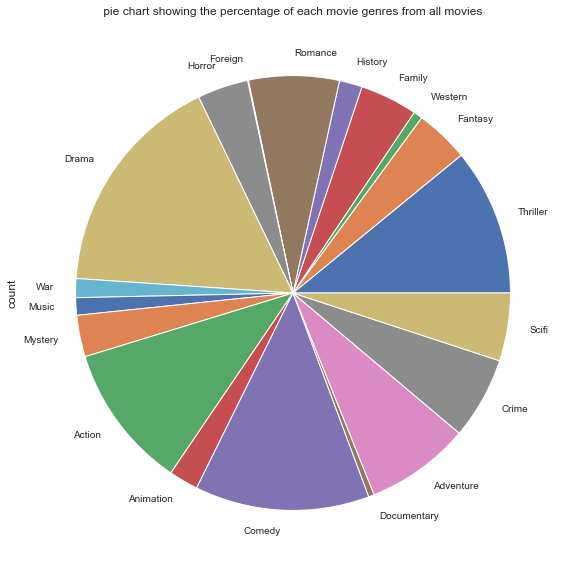

In [413]:
genre_analysis['count'].plot(kind = 'pie',figsize = (20,10),labels=genre_analysis['genres'], fontsize=10,);
plt.title(" pie chart showing the percentage of each movie genres from all movies ")
#plt.legend()
# a legend here wont be neccessary as the percentages are labeled with the genre names

In [414]:
# 5 longest movies
pop_5 = genre_analysis.nlargest(5,'runtime')[['genres','runtime']]
print(pop_5)

       genres     runtime
4     History  140.779310
9         War  133.641667
2     Western  123.157895
8       Drama  118.080532
16  Adventure  113.718182


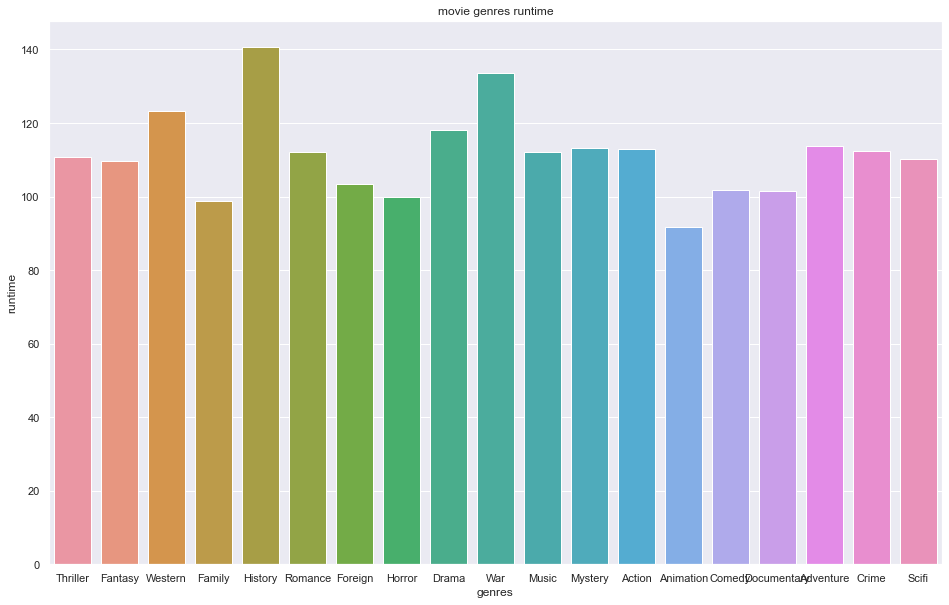

In [415]:
barplot ('genres','runtime',genre_analysis,"movie genres runtime")

the graph shows that history movie genre has the longest runtime in all movies, while animation has the shortest runtime, and runtime overall slighly varies between a genre and another

###  movie genre vote averages

In [416]:
genre_analysis.groupby('genres')['vote_average'].mean().sort_values(ascending = False)


genres
Documentary    6.830556
History        6.800690
War            6.792500
Western        6.671930
Drama          6.601190
Music          6.519091
Crime          6.447013
Animation      6.441935
Mystery        6.366160
Romance        6.353322
Adventure      6.234697
Thriller       6.210549
Foreign        6.200000
Family         6.181818
Fantasy        6.161765
Scifi          6.158974
Action         6.130349
Comedy         6.077335
Horror         5.891925
Name: vote_average, dtype: float64

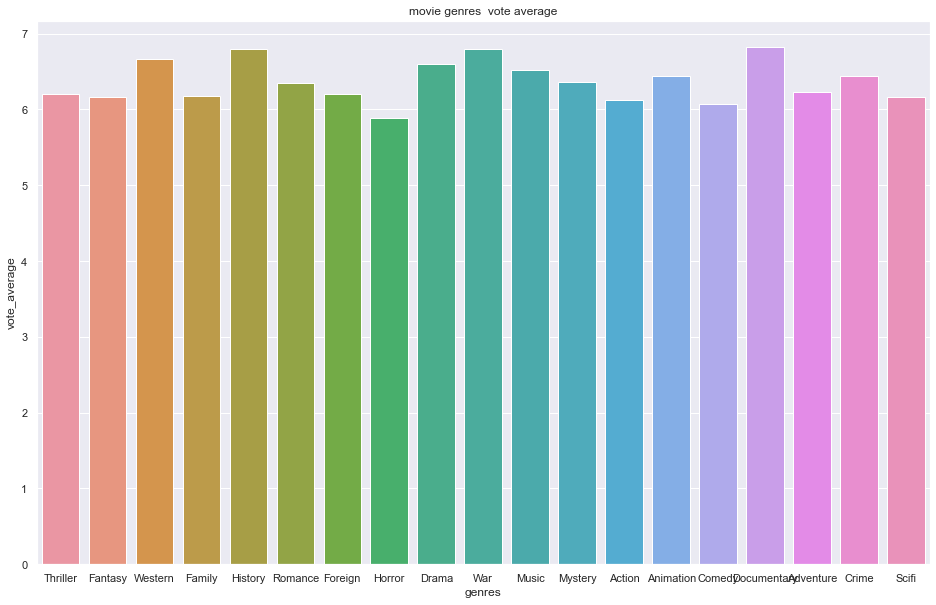

In [417]:
barplot ('genres','vote_average',genre_analysis,"movie genres  vote average")

this graph idicates that the variation between genres vote average is very very minute, this could also indicates that the vote average depends on the movie its self not any specific genre, with maybe to the execption of documentry being overall the highest in ratings on average and horror being overall the lowest on average between all the other genres

### most  profitable genres 

In [418]:
# 5 most costly
pop_5 = genre_analysis.nlargest(5,'budget')[['genres','budget']]
print(pop_5)

       genres        budget
13  Animation  8.168320e+07
16  Adventure  7.700829e+07
1     Fantasy  7.608146e+07
3      Family  6.861127e+07
18      Scifi  6.310593e+07


In [419]:
# 5 most revenues
pop_5 = genre_analysis.nlargest(5,'revenue')[['genres','revenue']]
print(pop_5)

       genres       revenue
13  Animation  2.794844e+08
16  Adventure  2.478302e+08
1     Fantasy  2.391538e+08
3      Family  2.258279e+08
18      Scifi  1.894015e+08


In [420]:
# 5 most returns/profits
pop_5 = genre_analysis.nlargest(5,'_9')[['genres','_9']]
print(pop_5)

         genres          _9
15  Documentary  772.444444
7        Horror  549.928571
10        Music  431.700000
2       Western  390.140351
9           War  389.958333


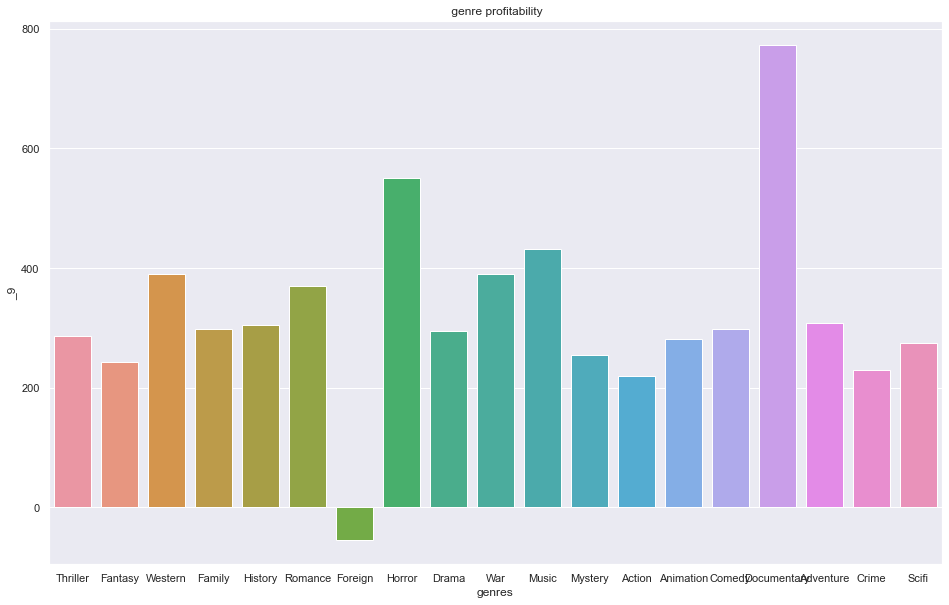

In [421]:
barplot ('genres','_9',genre_analysis," genre profitability")

the graph indicates that documantries then horror are far ahead of all other genres in their return on invesment ratios, other genres hover around the same average returns which is around 200%.
while the exeption here is clearly Foreign movies on averages have negative returns, which means that on average, foreign movies fail financially!

### most popular genres over the years

In [422]:
# 5 most popular genres
pop_5 = genre_analysis.nlargest(5,'popularity')[['genres','popularity']]
print(pop_5)

       genres  popularity
13  Animation   46.091029
16  Adventure   45.487885
18      Scifi   43.353786
1     Fantasy   42.866227
12     Action   37.270589


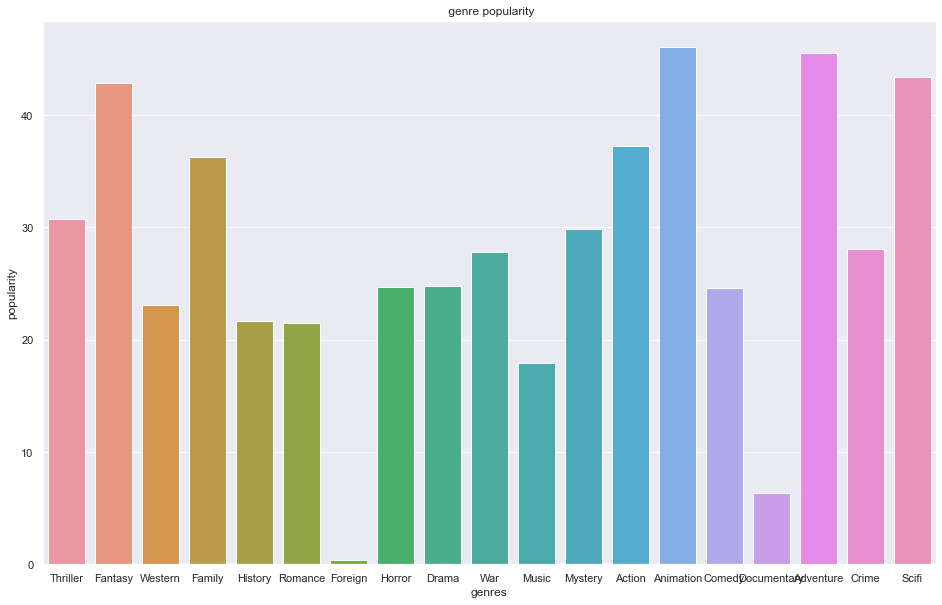

In [423]:
barplot ('genres','popularity',genre_analysis," genre popularity")

Again foreign movies are the least popular here, although this might be biased as the popularity metric might be measured in the united states, so this is the popularity of foreign movies in the states.
there are few genres which clearly stand out to be amogst the most popular;
they are : Animation, Adventure, scifi & Fantasy, all scored on avg above 40 points which is 10 points above all other genres.

# analyse datasets seperatly

### popularity of the top 5 popular genres over the years

Text(0.5, 1.0, 'A comparison between genre popularity over the years')

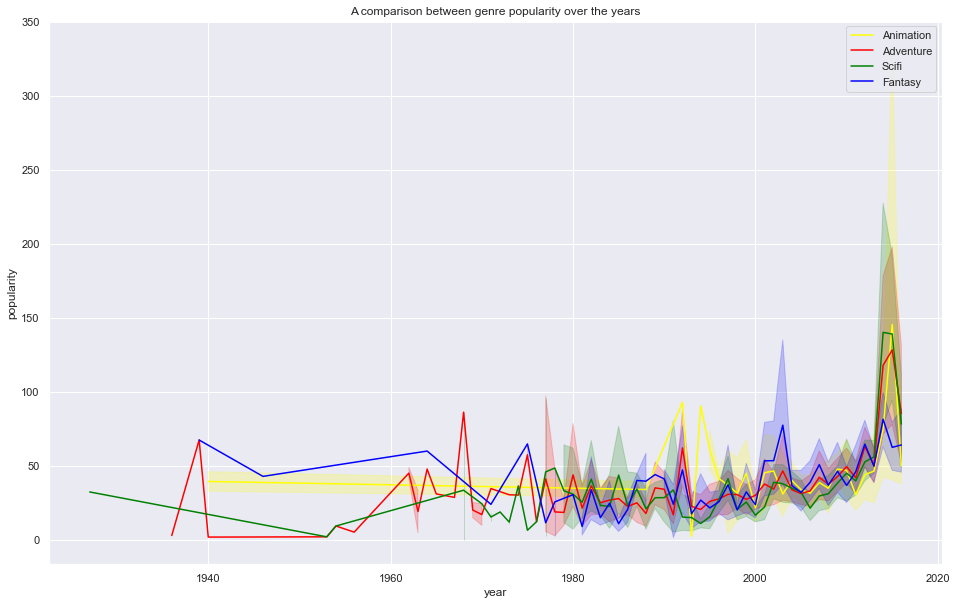

In [424]:
sns.lineplot(x='year',y='popularity',data=Animation,color = 'yellow', label = 'Animation' )
sns.lineplot(x='year',y='popularity',data=Adventure,color = 'red',label = 'Adventure' )
sns.lineplot(x='year',y='popularity',data=Scifi,color = 'green',label = 'Scifi')
sns.lineplot(x='year',y='popularity',data=Fantasy ,color = 'blue',label = 'Fantasy')
plt.title("A comparison between genre popularity over the years")

from the year 1940 to about 1965 Fantasy was the most popular genre then from the years 1965 adventure was competing with Fantasy all untill the mid 80s. In the 1980s scifi was the main contender till the mid ninties where a new comer "Animation" became the most popular genre

### distributions of runtime of different movie genres

In [425]:
from matplotlib import *
import sys
import pylab as pl

f = pl.figure( figsize =(7,7) )

<Figure size 504x504 with 0 Axes>

C:\Users\Star\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Star\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Star\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

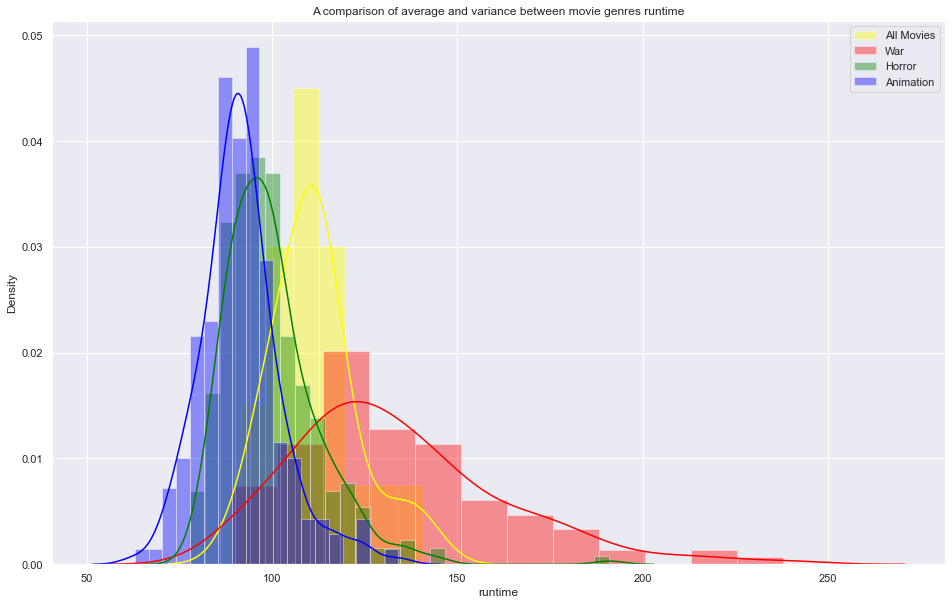

In [426]:
sns.distplot(genre_analysis.runtime,color = 'yellow', label = 'All Movies')
sns.distplot(War.runtime, color = 'red',label = 'War')
sns.distplot(Horror.runtime,color = 'green',label = 'Horror')
sns.distplot(Animation.runtime,color = 'blue',label = 'Animation')
plt.title("A comparison of average and variance between movie genres runtime")
plt.legend()


The movie runtime distributions could give us insights on how these genres are structured, furthermore, genres like animation seem to have very low variance in runtime, which might indicate that animation movie plot are pretty muh similar.
yet movies like war have a big range of runtime, therefore there are plenty of variation in the war stories that are being told on screen!

**using dis instead of dist as recommended, didn't produce the same wanted results which as shown above all the distributions compared to each other on the same graph .**


Text(0.5, 1.0, 'A comparison of average and variance between movie genres runtime')

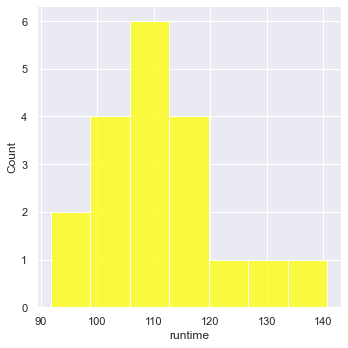

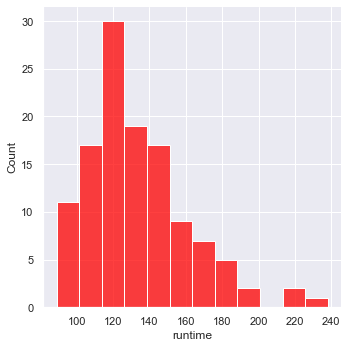

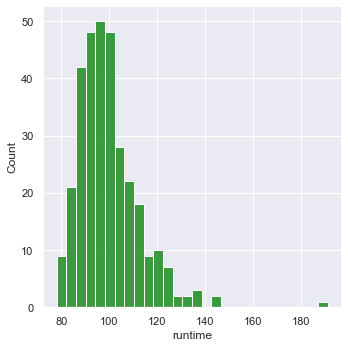

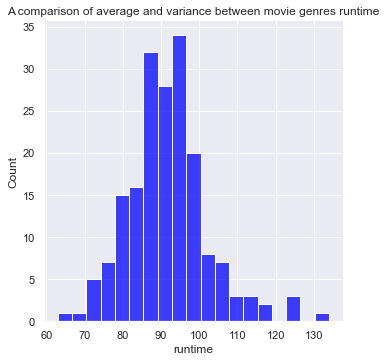

In [427]:
sns.displot(genre_analysis.runtime,color = 'yellow', label = 'All Movies')
sns.displot(War.runtime, color = 'red',label = 'War')
sns.displot(Horror.runtime,color = 'green',label = 'Horror')
sns.displot(Animation.runtime,color = 'blue',label = 'Animation')
plt.title("A comparison of average and variance between movie genres runtime")

<a id='conclusions'></a>
# Conclusions


> **Findings**:

## General findings
1. The movie dataset contains movies from the year 1916 to the year 2017
2. The data shows that the average rating of the movies has been steadily decreasing which indicates that more modern movies are of less quality than their predecessor
3. The sweet spot for movie runtime length the best rutime range is between 75 and 200 minutes with 120 minutes being the optimal
4. The highest  rated movie is a movie called "Dancer, Texas Pop" with a perfect rating of 10
5. The year with the highest rated movies was the year 1927 wich confirms the decreasing rating through the years finding
## The most popular movie of all time is "minions"
7. The year with most popular movies is the year 1975
8. Movie popularity also have suffered since the mid 70s, maybe because other sources of entertainment has been competing with watching movies
9. there seems to be a correlation between the popularity and the rating, but to a certain threshold movis with rating higher that 8.0 suffer incredibly in popularity, Moreover the very high rated movies have a rating influenced by a nich group pf people, thus the very high rating!
10. The longest movie in this list is titles "Carlos" which is over 5 hours long!!
11. "A Charlie Brown Christmas" is one of the shortest movies on the list, it is considered a short movie

## Findings about the financials
**the budget and revenue of the associated movies are in terms of 2010 dollars, accounting for inflation over time.**


12. The highest returns ever done by any movies is the famous movie "Modern Times" created by charley chaplin
13. followed by 2 horror movies 'Nurse 3-D' & 'Paranormal Activity', all three have staggering return on invesmet percentages!
14. This is a list of few of the top profitable returns from all movies
    & their percentages:
    Gone with the Wind                             9904.0
    The Big Parade                                 8880.0
    Saw                                            8559.0
    The Evil Dead                                  8300.0
    E.T. the Extra-Terrestrial                     7452.0
15. the vote average of the most successfull movies is 7.2
16. the vote average of the most failed movies is 5.08
17. the movie "1911" is one of the worse performing movies with a 100% loss
18. Most profitable year in the movie industry on average was 1925
19. There is a strong correlation between vote average and returns, the better the movie is rater the higher the returns
20. The strongest correlation though is between popularity and revenue, the more popular the movie is the higher money it will bring. That is maybe due to Marketing, the movie doesn't have to have a high rating as much as it has to be marketed for well, inorder to perform well financially. The graph is shown below.


## Genre analysis findings
21. The genre with most movies is Drama, followed by comedy, then by Thriller
22. This a list of genres with the longest movies on average
          genres     runtime
        History        140.779310
            War       133.641667
        Western        123.157895
          Drama        118.080532
       Adventure      113.718182
    
runtime in minutes

23. the genre with the highest rating on average is Documentary with a rating of 6.830556 on average
24. while the genre with the poorest rating is horror with rating average of 5.891925
#### surprizingly the two most profitable movie genres on average are the highest in the ratings and the lowest in the ratings
which is contrary to one of our previous foundings it seems that rating isn't influential at all to the profits, the best indicator of returns is cheapness or low budget. graph below shows that movies with the lowest budgets have the highest returns!!

25. Most popular movie genres over the years list

       genres    popularity
       
       Animation   46.091029
       Adventure   45.487885
       Scifi       43.353786
       Fantasy     42.866227
       Action      37.270589
       

       
26. The most profitable genre is Animation which was probable as the most popular movie is an animation  

       
27. from the year 1940 to about 1965 Fantasy was the most popular genre then from the years 1965 adventure was competing with Fantasy all untill the mid 80s. In the 1980s scifi was the main contender till the mid ninties where a new comer "Animation" became the most popular genre
28. The movie runtime distributions could give us insights on how these genres are structured, furthermore, genres like animation seem to have very low variance in runtime, which might indicate that animation movie plot are pretty muh similar.
yet movies like war have a big range of runtime, therefore there are plenty of variation in the war stories that are being told on screen!



 


> 

##### Limitations
1. The main limitation of this dataset was the missing data or the data with value 0, it does'nt make sense that a movie budget was 0 or even the revenue is 0, even if the return on invesment was -100%.
this faulty data was over 25% of the dataset, instead of working with 4800 instance , the majority of the anlysis was done on 3200 instances only
2. Another limitation was missinforming data, again like the budget.
when calculating the profits, the movie with highest profits was "paranormal activity", with a budget as low as 15k, this is most probably wrong data. The analysis was done again with the profits over 10k%  removed, 10k% isn't realistic at all, the instances removed were about 34, therefore the integrity of the analysis wasn't compromised.


> 

Text(0.5, 1.0, 'popularity & revenue strong correlation')

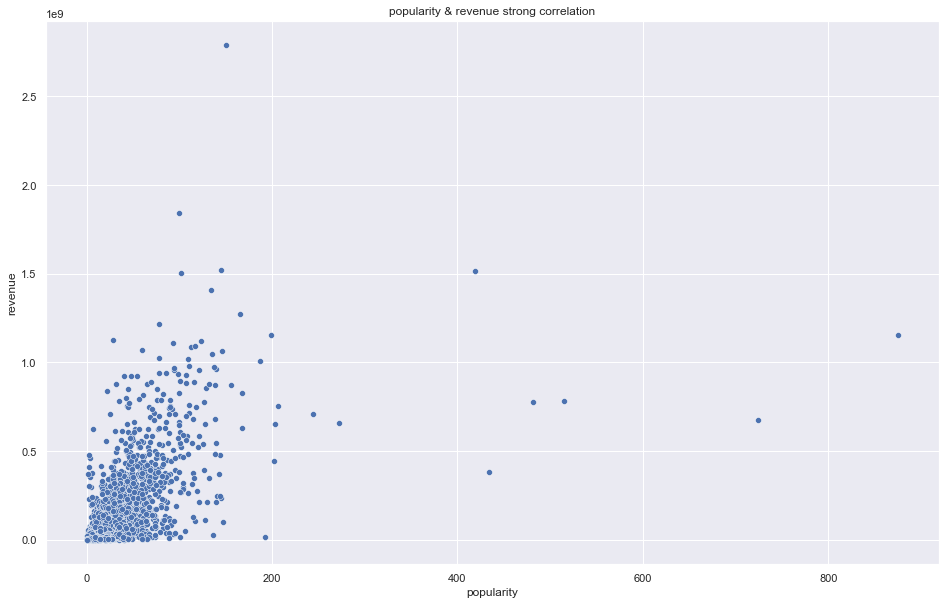

In [428]:
sns.scatterplot(x ='popularity', y = 'revenue' ,data = profits )
plt.title("popularity & revenue strong correlation")


The strongest correlation though is between popularity and revenue, the more popular the movie is the higher money it will bring. That is maybe due to Marketing, the movie doesn't have to have a high rating as much as it has to be marketed for well, inorder to perform well financially. 

Text(0.5, 1.0, 'low budget movies have the highest return on invesment')

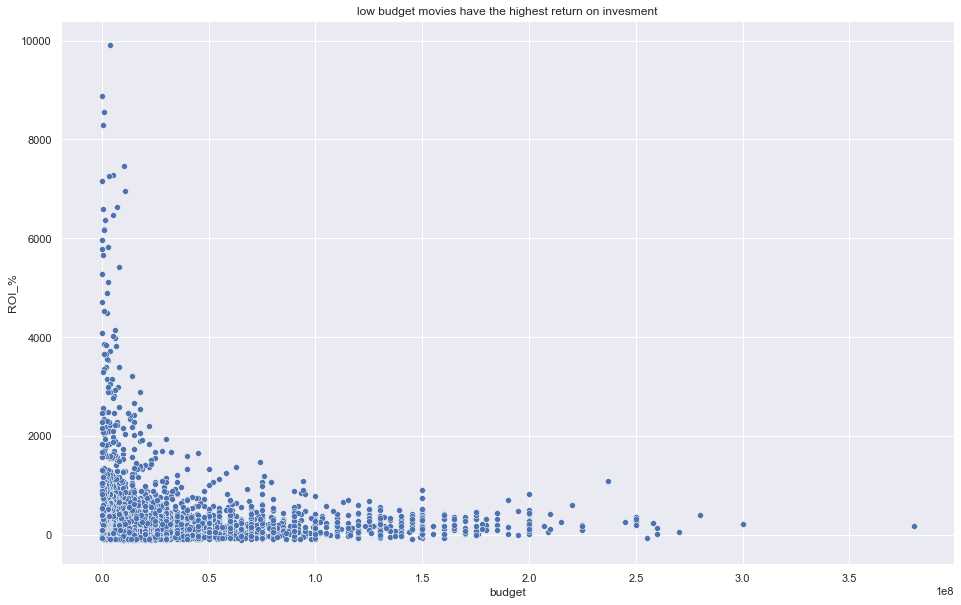

In [429]:
sns.scatterplot(x ='budget', y = 'ROI_%' ,data = profits )
plt.title("low budget movies have the highest return on invesment")

the best indicator of returns in ratio to budget is cheapness or low budget. this graph shows that movies with the lowest budgets have the highest returns!!

the end.